In [ ]:
# Library

import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno 
import matplotlib.patches as mpatches
import shap

# FE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures, KBinsDiscretizer
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, fbeta_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, make_scorer
from sklearn.preprocessing import RobustScaler, MinMaxScaler

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE

# # Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# CUSTOMER RELATIONSHIP MANAGEMENT : E-COMMERCE CUSTOMER CHURN
by : Beami Mbani Wibawa

# Business Problem Understanding

- Context

Customer relationship management berhubungan dengan loyalitas customer ataupun sebaliknya. Customer yang loyal merupakan salah satu faktor penting keberhasilan bisnis dalam menjaga maupun meningkatkan profitabilitas di suatu perusahaan. Berbagai penelitian telah membuktikan bahwa mempertahankan customer lama yang loyal lebih menguntungkan daripada memperoleh customer baru, karena customer lama akan dengan mudah membuat iklan dan promosi dari mulut ke mulut berdasarkan kepuasan mereka dan juga hanya membutuhkan biaya yang lebih rendah dalam memelihara akun mereka, serta juga terdapat manfaat loyalitas seperti memiliki kemungkinan lebih kecil untuk meninggalkan platform. Sedangkan dalam memperoleh customer baru tidak terlalu mudah dan juga membutuhkan lima sampai enam kali lipat biaya dari mempertahankan customer lama ( [customer](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers) ). 

Mempertahankan loyalitas customer yang tinggi merupakan tantangan dalam bisnis. Berkurangnya customer adalah salah satu masalah paling penting untuk bisnis. Maka penting untuk mengetahui track dan menganalisis berapa banyak customer yang meninggalkan platform dan berapa banyak yang bertahan dan alasan dibalik itu. Mengetahui perilaku customer dapat sangat meningkatkan proses pengambilan keputusan dan selanjutnya dapat membantu mengurangi churn untuk meningkatkan profitabilitas. Tipe churn dibagi dalam dua jenis yaitu involuntary churn dan voluntary churn. Involuntary churn adalah customer yang pindah dari platform berdasarkan faktor eksternal seperti berpindah lokasi, kematian, dll. Sedangkan voluntary churn adalah customer yang berpindah dari platform karena sengaja berhenti maupun sengaja beralih ke platform lain. Dari tipe churn yang tidak sulit diprediksi adalah voluntary churn.

Untuk memprediksi customer "voluntary churn" yang didefinisikan sebagai tingkat dimana customer meninggalkan platform, maka dilakukan analisis churn dan juga melakukan pendekatan dengan machine learning. Dimana hal tersebut diharapkan dapat memprediksi customer yang churn dengan sukses berdasarkan riwayat data sebelumnya menggunakan karakteristik customer dari profil, histori pembelian, dll. Sehingga hal tersebut dapat menjadi dasar keputusan tim mengambil langkah selanjutnya dalam hal strategi pemasaran.

- Target:
- 0 : customer yang tidak churn 
- 1 : customer yang churn
- (customer yang churn di e-commerce ini ditandai dengan angka yang cenderung tinggi pada hari terakhir ke 2 mereka bertransaksi, lama pemakaian/tenure hanya sebentar yaitu di 0-2 bulan saja, lebih banyak memberikan complain, serta jenis barang yang dibeli (pembelian barang mobile phone yang cenderung churn))

- problem statement

Tingkat keberhasilan (success rate) penjualan ke customer yang sudah ada adalah 60-70%, sedangkan tingkat keberhasilan penjualan ke customer baru adalah 5-20%. Maka perlu untuk memperhatikan dan meningkatkan hubungan dengan customer yang sudah ada dengan tidak membiarkan customer lama churn dan juga memberikan promosi kepada customer lama yang akan churn. Hal tersebut akan memberikan keuntungan jangka panjang pada perusahaan seperti pengaruhnya terhadap profit perusahaan. Namun tantangannya adalah, jika kita tidak tahu customer manakah yang akan churn maka kita akan cenderung menargetkan semua customer untuk diberikan promosi, dimana ini dapat menyia-nyiakan biaya pemasaran [referensi](https://www.profitwell.com/recur/all/customer-acquisition-vs-retention)

- Goal

Berdasarkan permasalahan, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seorang customer akan churn atau tidak dari platform. Sehingga perusahaan akan memfokuskan strategi pemasaran pada customer yang akan meninggalkan platform.

Perusahaan ingin mengetahui apa/faktor/variabel apa yang membuat seorang customer berhenti memakai/tidak dari platform mereka. Sehingga perusahaan dapat membuat strategi pemasaran yang lebih baik dalam mendekati customer yang akan churn.

- Analytic Approach

Saya akan melakukan analisis data untuk menemukan pola yang membedakan customer yang akan churn maupun yang tidak. kemudian saya akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang customer akan churn/tidak di platform mereka.


- Confussion Metric

![](https://txt.cohere.ai/content/images/2022/06/feature.png)

- TN = diprediksi tidak churn dan aktualnya memang tidak churn
- FP = diprediksi churn padahal aktualnya tidak churn
- FN = diprediksi tidak churn padahal aktualnya churn
- TP = diprediksi churn dan aktualnya memang churn

- Metric Evaluation

Type 1 error : False Negatif  
Konsekuensi: kehilangan customer karena customer diprediksi tidak churn, padahal churn

Type 2 error : False Positive  
Konsekuensi: biaya pemasaran yang sia-sia karena customer diprediksi churn padahal tidak churn

Berdasarkan problem statement dan konsekuensi diatas, Saya merasa FN dan FP sama-sama penting, maka sebisa mungkin yang akan saya lakukan adalah membuat model yang dapat membuat customer tidak berkurang/hilang tanpa membuat biaya pemasaran sia-sia. Saya perlu meminimalisir bagian False Negative Rate. Jika model gagal dalam meminimalkan False Negative Rate (Type 1 error), artinya customer yang harusnya churn diprediksi oleh model sebagai customer tidak churn. Jika ini terjadi, maka perusahaan akan mengalami kehilangan customer sehingga mempengaruhi pendapatan perusahaan itu sendiri. Namun, saya juga harus memperhatikan angka False Positive (Type 2 error) pada hasil prediksi. Jika tinggi, berarti model salah memprediksi customer yang tidak churn. Ini akan menyebabkan biaya yang terbuang sia-sia karena customer yang padahal tidak akan churn namun diprediksi churn. Maka model yang saya cari adalah model yang memberikan prediksi akurat pada kelas positif dengan nilai recall setinggi mungkin untuk menghindari kehilangan customer berpotensi loyal diikuti dengan nilai precision yang juga harus sama tingginya untuk menghindari terbuangnya biaya yang dialokasikan. Maka saya harus menyeimbangkan antara precision dan recall dari 1 kelas positif. Maka metric yang akan saya gunakan adalah F1-Score. [referensi](https://stevkarta.medium.com/membicarakan-precision-recall-dan-f1-score-e96d81910354)

# Penjelasan metric
- recall = perbandingan antara True Positive (TP) dengan banyaknya data yang sebenarnya positif (TP/(TP+FN)) --> menurunkan nilai FN
- precission = perbandingan antara True Positive (TP) dengan banyaknya data yang diprediksi positif (TP/(TP+FP)) --> menurunkan nilai FP
- F1-Score adalah harmonic mean dari precision dan recall

# Data Variable Description
- Tenure : Masa tenure customer
- WarehouseToHome : jarak antara gudang ke rumah customer
- NumberOfDeviceRegistered : jumlah perangkat yang terdaftar
- PreferedOrderCat : kategori yang disukai customer bulan lalu
- SatisfactionScore : score kepuasan customer
- MaritalStatus : status pernikahan customer
- NumberOfAddress : jumlah alamat yang terdaftar
- Complain : ada tidaknya komplain di bulan lalu (0: tidak ada komplain, 1: ada komplain)
- DaySinceLastOrder : hari order terakhir
- CashbackAmount : rata-rata cashback di bulan lalu
- Churn : 0 - tidak churn, 1- churn

sumber : [data ecommerce customer churn](https://www.kaggle.com/code/ankitverma2010/e-commercecustomerchurn/data)

In [4]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


# EXPLORATORY DATA ANALYSIS

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


- Terdapat 3941 baris dan 11 kolom. 
- Data numerikal yang bersifat kuantitatif-continuous terdapat pada tenure, warehouseToHome, DaySinceLastOrder, dan CashbackAmount. 
- Data numerikal yang bersifat kuantitatif-discrete adalah NumberOfDeviceRegistered, SatisfactionScore, NumberOfAddress, Complain, dan Churn. 
- Data Kategorikal yang bersifat kualitatif- nominal adalah PreferedOrderCat, MaritalStatus.
- Terdapat missing value pada kolom tenure, warehouseToHome, DaySinceLastOrder.

In [6]:
# perbandingan target dari kelas 0 dan 1 (yang tidak churn dan churn)
df['Churn'].value_counts()

0    3267
1     674
Name: Churn, dtype: int64

In [7]:
# persentase perbandingan target dari kelas 0 dan 1 (yang tidak churn dan churn)
df['Churn'].value_counts()/len(df)*100

0    82.897742
1    17.102258
Name: Churn, dtype: float64

- Data terindikasi imbalance antara kelas 0 dan 1 dengan persentase 82,89% : 17,10%. Sehingga saya akan menggunakan metode resampling SMOTE yaitu menambah kelas minoritas yang akan dilakukan pada saat modeling. Data imbalance sendiri dapat memiliki dampak buruk pada model machine learning pada saat memprediksi kelas minoritas/ kelas yang lebih sedikit jumlahnya.

In [8]:
df.describe(include='object')

,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


- customer yang memakai platform adalah kebanyakan yang memiliki status married dan kategori yang disukai adalah kebanyakan dari kategori laptop dan accessory.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,3747.0,10.081398,8.498864,0.0,2.0,9.00,16.00,61.00
WarehouseToHome,3772.0,15.650583,8.452301,5.0,9.0,14.00,21.00,127.00
NumberOfDeviceRegistered,3941.0,3.679269,1.013938,1.0,3.0,4.00,4.00,6.00
SatisfactionScore,3941.0,3.088302,1.381832,1.0,2.0,3.00,4.00,5.00
NumberOfAddress,3941.0,4.237757,2.626699,1.0,2.0,3.00,6.00,22.00
Complain,3941.0,0.282416,0.450232,0.0,0.0,0.00,1.00,1.00
DaySinceLastOrder,3728.0,4.531652,3.667648,0.0,2.0,3.00,7.00,46.00
CashbackAmount,3941.0,176.707419,48.791784,0.0,145.7,163.34,195.25,324.99
Churn,3941.0,0.171023,0.376576,0.0,0.0,0.00,0.00,1.00


- CashbackAmount memiliki rentang 145.7 - 324.99
- Tenure memiliki rentang 0 - 61
- WarehouseToHome memiliki rentang 5 - 127
- NumberOfDeviceRegistered memiliki rentang 1 - 6
- SatisfactionScore memiliki rentang 1 - 5
- NumberOfAddress memiliki rentang 1 - 22
- complain yang bersifat numerikal discrete yang diubah jadi kualitatif nominal yaitu 0-tidak ada complain dan 1-complain
- DaySinceLastOrder memiliki rentang 0 - 46
- Churn yang bersifat numerikal discrete yang diubah jadi kualitatif nominal yaitu 0-tidak ada complain dan 1-complain

In [10]:
# melihat unique value dari masing-masing feature
for col in df:
    print(col)
    print(df[col].unique())
    print('')

Tenure
[15.  7. 27. 20. 30.  1. 11. 17.  6. 16. 10. nan  8. 19.  0.  3.  5.  9.
 18. 12. 24.  4. 61. 25. 13. 14.  2. 21. 29. 26. 23. 31. 22. 28. 51. 60.
 50.]

WarehouseToHome
[ 29.  25.  13.  15.  16.  11.  12.   7.  26.  20.  14.   8.  21.  22.
  27.  18.  33.   9.  17.  nan   6.  31.  28.  10.  19.  32.  23.  30.
  35.  34.  24.   5.  36. 127.]

NumberOfDeviceRegistered
[4 3 6 2 5 1]

PreferedOrderCat
['Laptop & Accessory' 'Mobile' 'Fashion' 'Others' 'Mobile Phone' 'Grocery']

SatisfactionScore
[3 1 4 2 5]

MaritalStatus
['Single' 'Married' 'Divorced']

NumberOfAddress
[ 2  5  7  8  3  1  9  4 10 11  6 19 22 21]

Complain
[0 1]

DaySinceLastOrder
[ 7. nan  8. 11.  2.  1.  4.  3.  6.  0. 14.  9. 10. 12.  5. 17. 30. 18.
 16. 13. 15. 46. 31.]

CashbackAmount
[143.32 129.29 168.54 ... 147.66 231.86 153.73]

Churn
[0 1]



- Berdasarkan unique value dari feature PreferedOrderCat terdapat format penulisan 'Mobile' dan 'Mobile Phone'. maka format penulisan 'Mobile' akan saya ganti menjadi 'Mobile Phone'

In [11]:
# mengubah format penulisan 'Mobile' jadi 'Mobile Phone'
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')

In [12]:
# melihat numerical features
dfnum = df.select_dtypes(exclude='object').columns
dfnum

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount', 'Churn'],
      dtype='object')

In [13]:
# jumlah feature yang numerikal
len(dfnum)

9

In [14]:
# feature yang numerical continuous
dfkon = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']
len(dfkon)

4

In [15]:
# feature yang numerikal discrete
dfdis = ['NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'Churn']
len(dfdis)

5

# Numerical feature (univariate analysis)

- Outlier

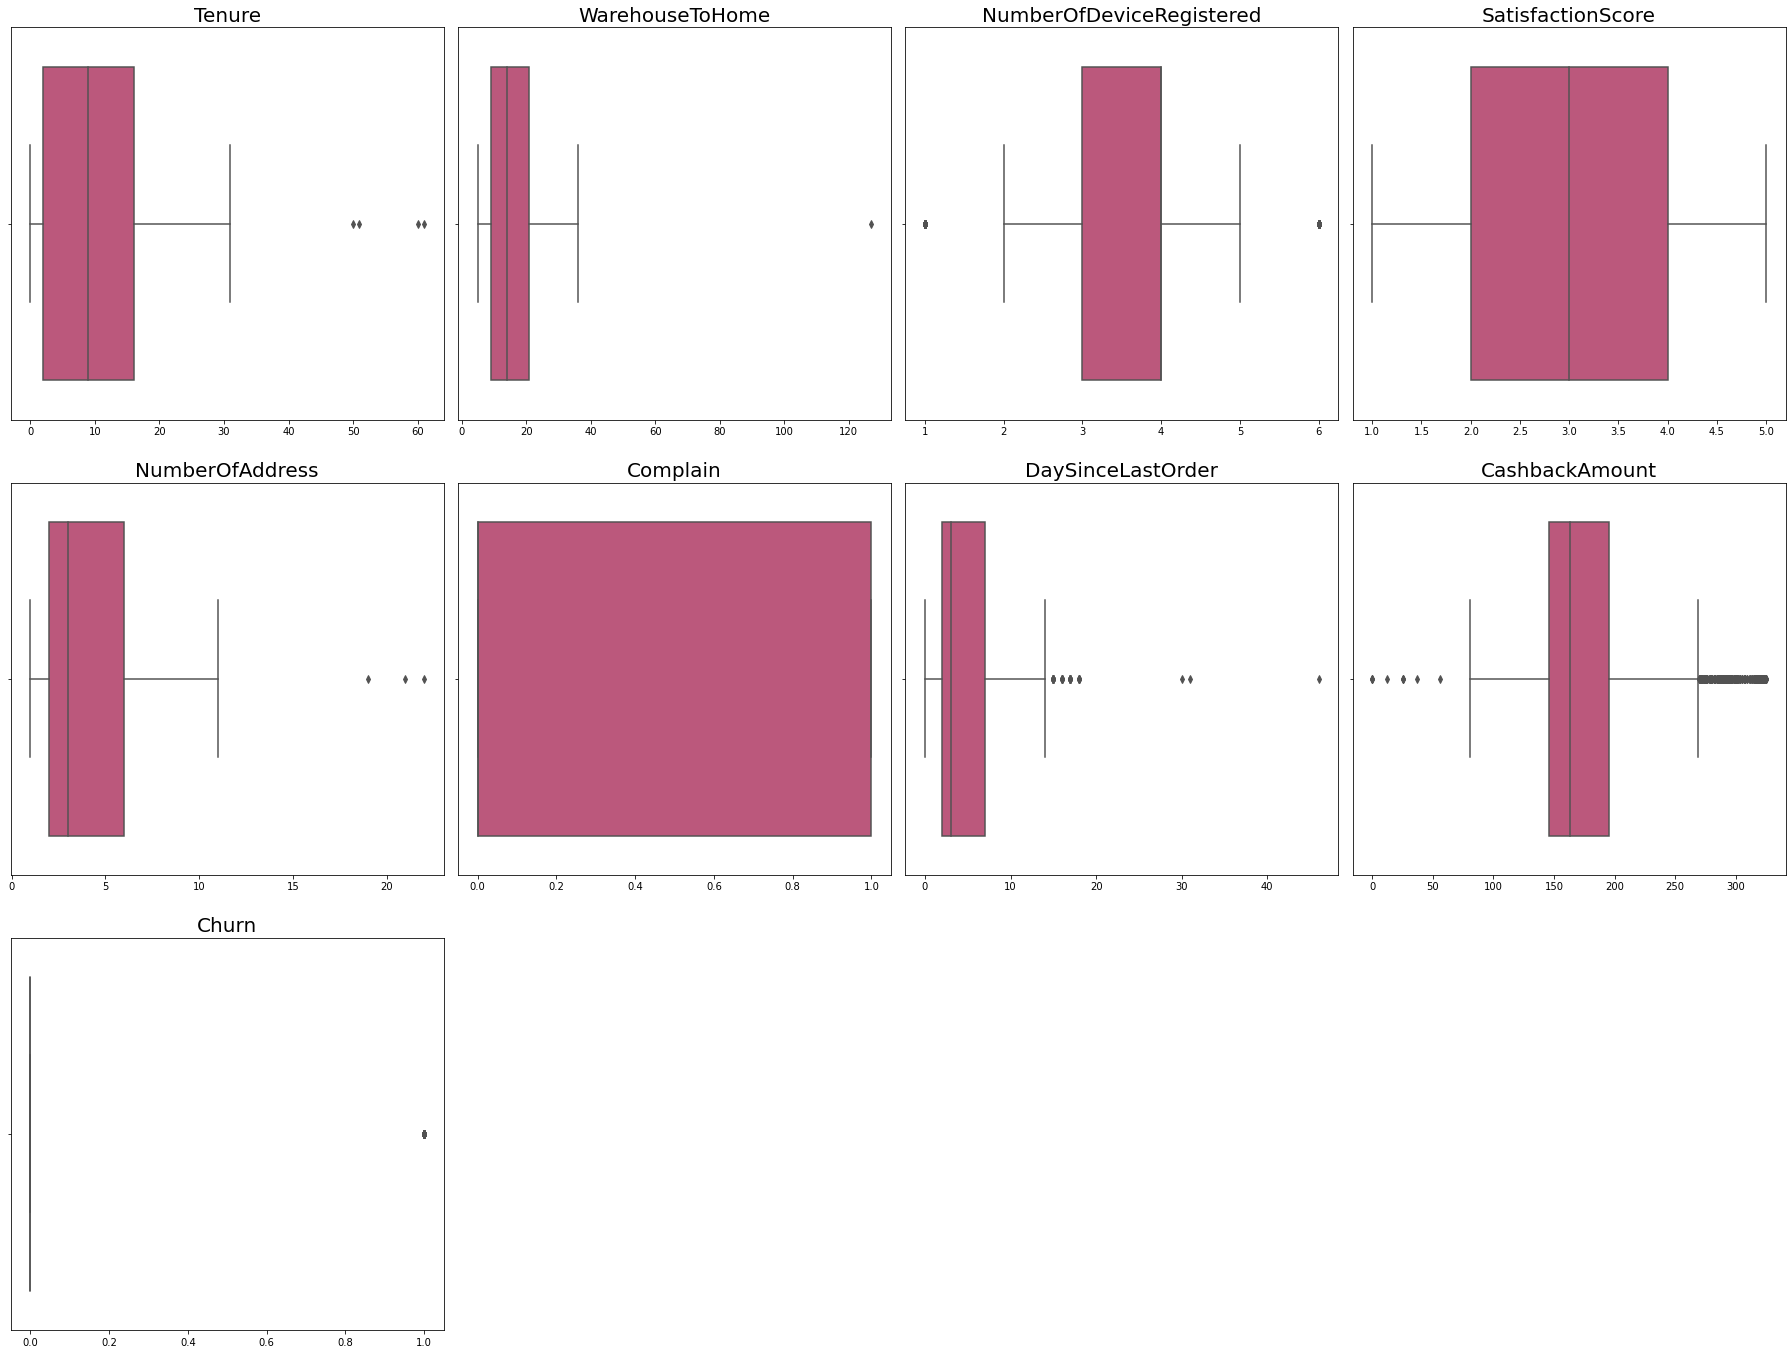

In [16]:
# melihat outlier data numerikal continuous
plt.figure(figsize=(25,25))
for i in range(0, len(dfnum)):
    plt.subplot(4,4,i+1)
    sns.boxplot(x=df[dfnum[i]], palette='plasma')
    plt.title(dfnum[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

- Terdapat Outlier di feature 'Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount'

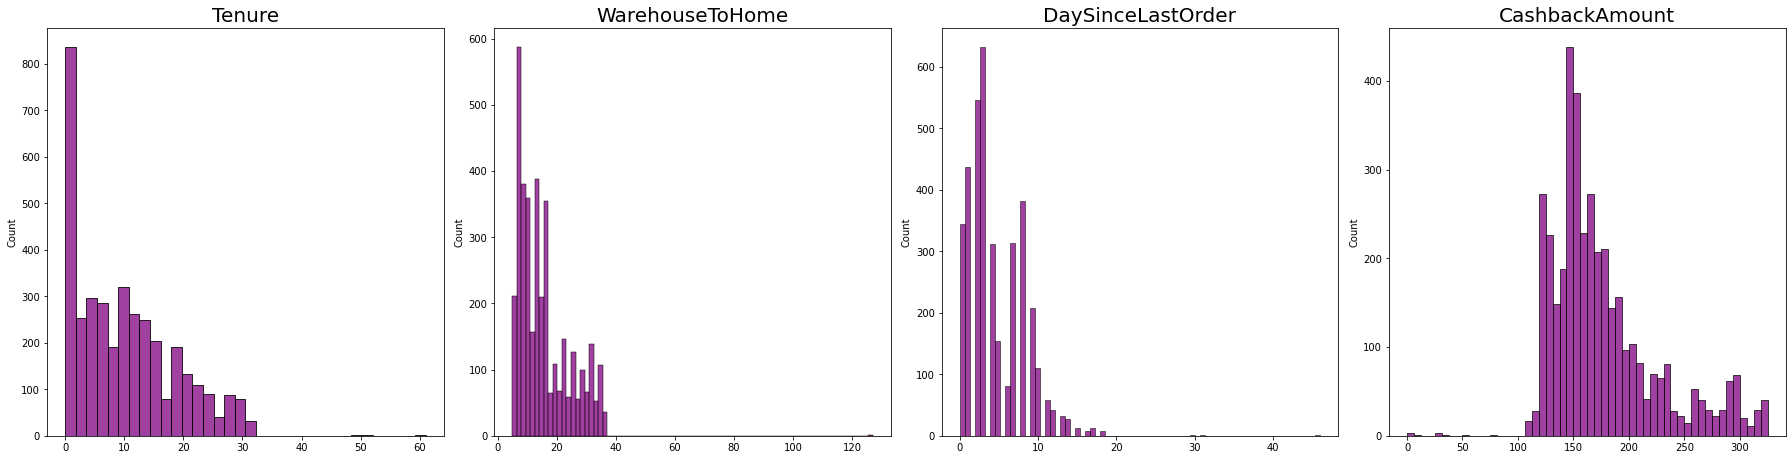

In [17]:
# melihat distribusi data numerikal continuous
plt.figure(figsize=(25,25))
for i in range(0, len(dfkon)):
    plt.subplot(4,4,i+1)
    sns.histplot(x=df[dfkon[i]], color='purple')
    plt.title(dfkon[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

- Distribusi data pada 'Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount' memiliki distribusi data yang tidak normal yaitu skew ke kanan.

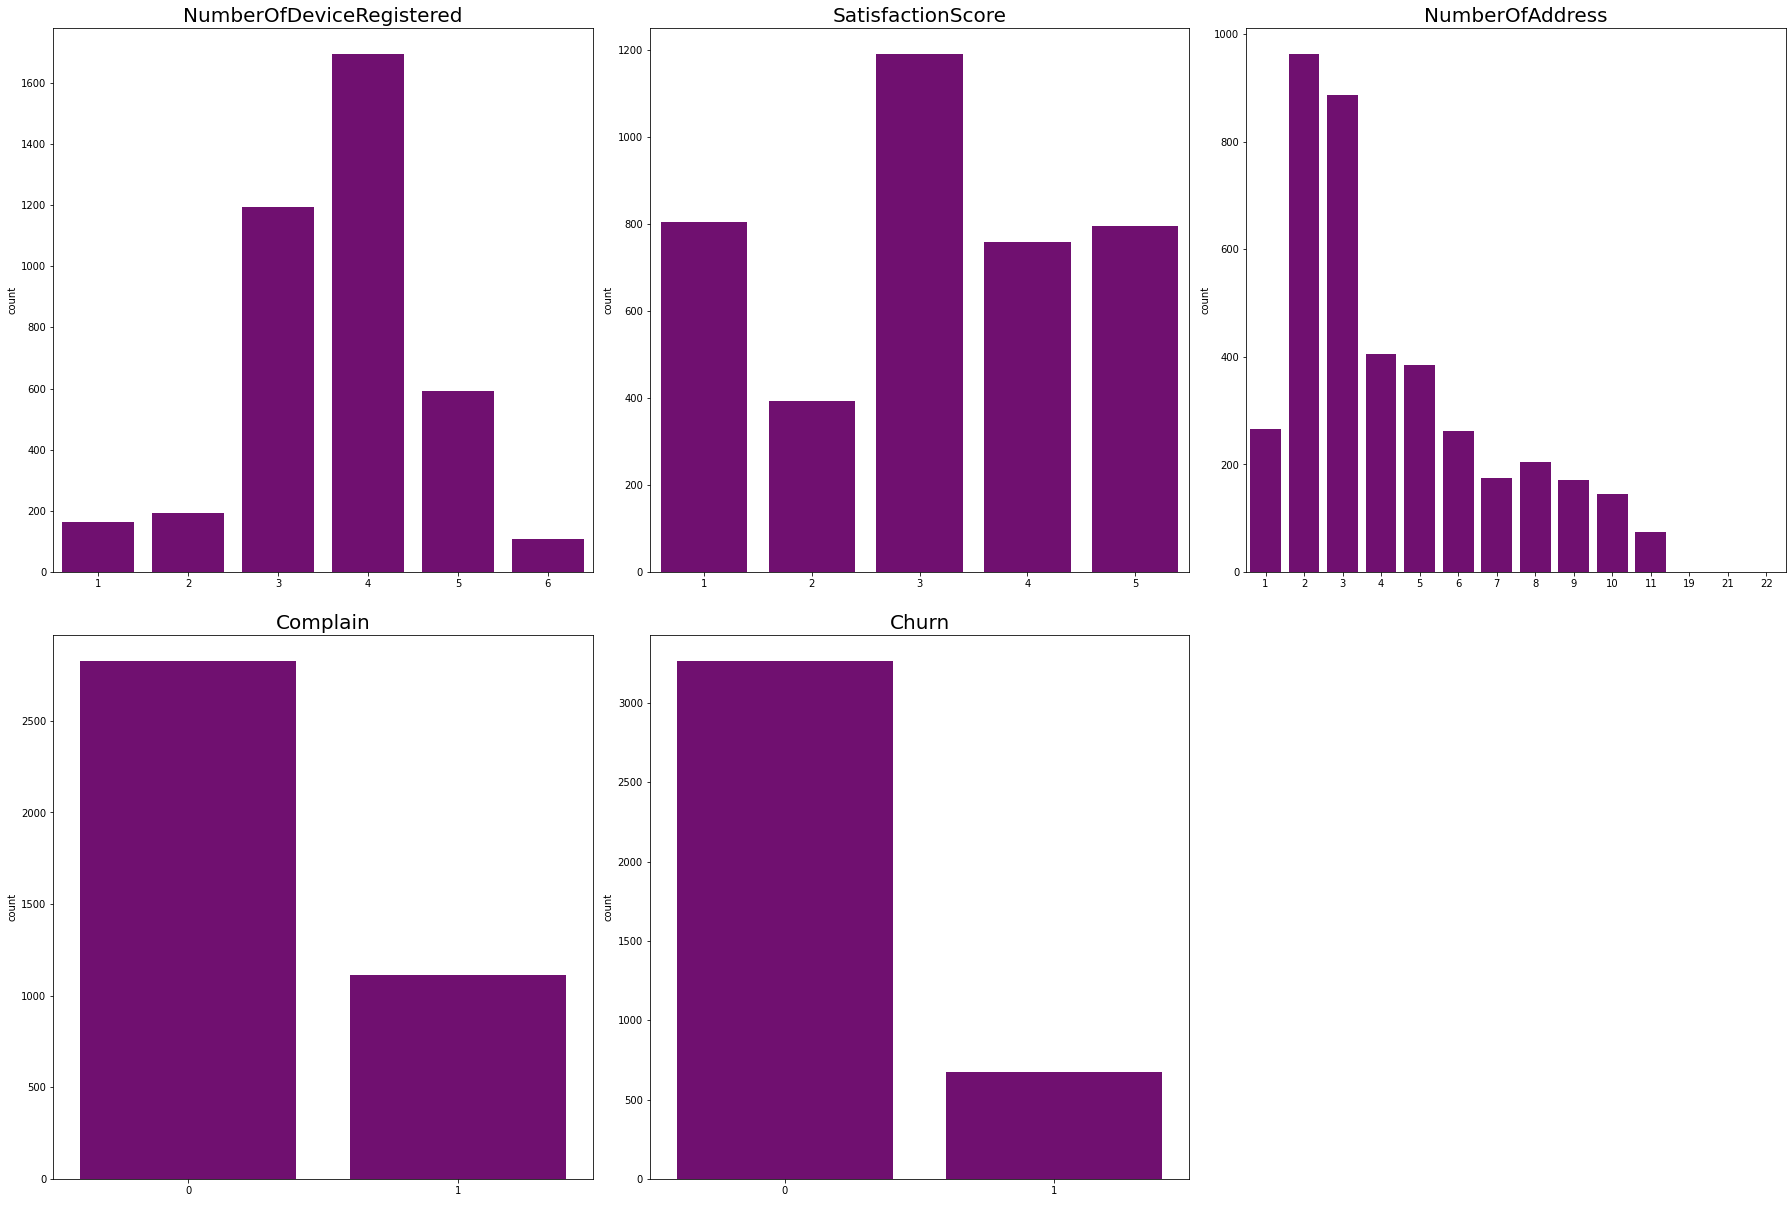

In [18]:
# melihat frekuensi dari data numerikal discrete
plt.figure(figsize=(25,25))
for i in range(0, len(dfdis)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[dfdis[i]], color='purple')
    plt.title(dfdis[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

- number of device registered yang merupakan jumlah perangkat yang terdaftar di platform.Customer paling banyak memiliki 4 perangkat.
- satisfaction score yang merupakan nilai kepuasan customer. Customer paling banyak memberikan angka 3.
- number of address yang merupakan jumlah alamat yang terdaftar paling banyak ada di angka 2.
- complain yang merupakan komplain oleh customer. Customer yang tidak churn lebih banyak memberikan komplain. Namun karena datanya imbalance maka akan dianalisis lebih lanjut. Seperti dapat dilihat pada grafik churn bahwa tingkat frekuensi customer yang tidak churn (0) lebih banyak daripada customer yang churn (1).

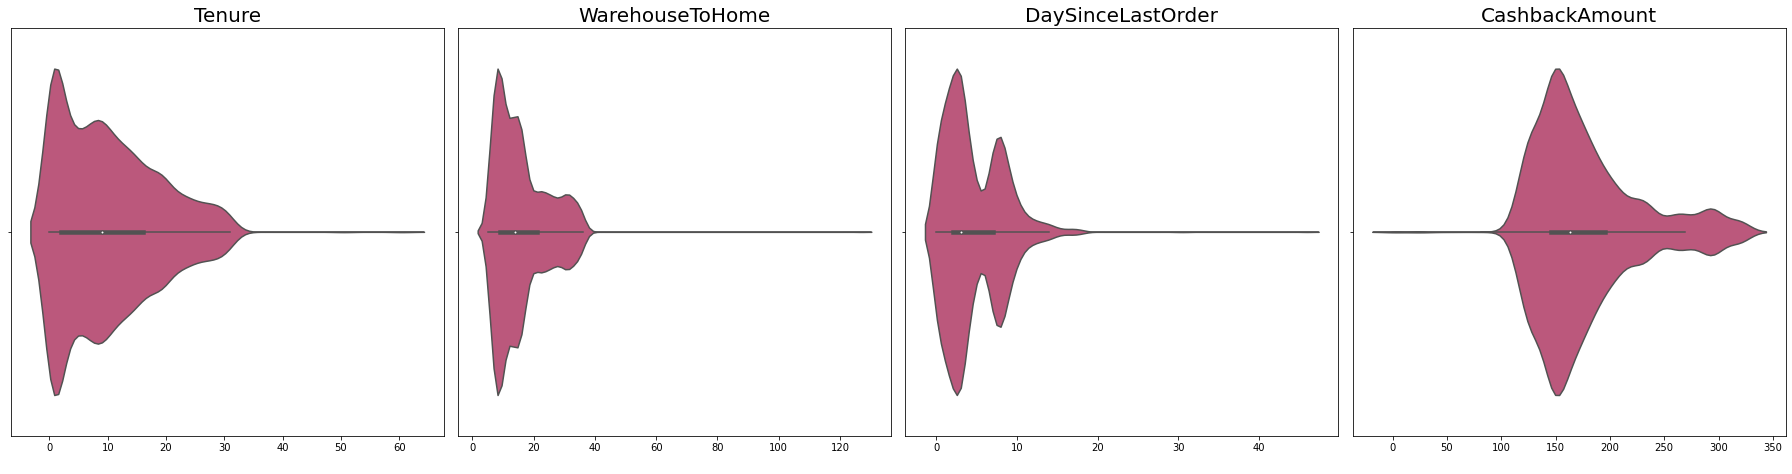

In [19]:
# melihat lebih banyak direntang berapa pada data numerikal continuous
plt.figure(figsize=(25,25))
for i in range(0, len(dfkon)):
    plt.subplot(4,4,i+1)
    sns.violinplot(x=df[dfkon[i]], palette='plasma')
    plt.title(dfkon[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

- pada Tenure yang merupakan masa penggunaan platform e-commerce dari pertama mendaftar dalam satuan bulan lebih banyak pemakaian platform di bulan 0-2, bisa jadi dikarenakan customer masih beradaptasi atau  customer menemukan kategori produk yang dicari yang tidak ada di platform lain atau harga lebih murah dibandingkan platform lain, lalu setelah menemukan barang incaran,customer tidak menggunakannya lagi.
- pada warehouseToHome yang merupakan jarak gudang dengan rumah customer diatas 17Km menunjukkan tingkat penggunaan platform yang berkurang lebih tinggi, hal ini bisa dipengaruhi oleh naiknya ongkos kirim.
- Pada DaySinceLastOrder megalami tingkat penggunaan platform yang fluktuatif naik turun, mungkin disebabkan oleh outlier juga. Penggunaan paling banyak ada di hari 0-2 setelah order.
- pada CashbackAmount yang merupakan cashback yang idterima oleh customer dari platform paling banyak di angka 150.

In [20]:
# melihat categorical features
dfcat = df.select_dtypes(include='object').columns
dfcat

Index(['PreferedOrderCat', 'MaritalStatus'], dtype='object')

In [21]:
# jumlah feature yang kategorikal
len(dfcat)

2

# Categorical feature (univariate analysis)

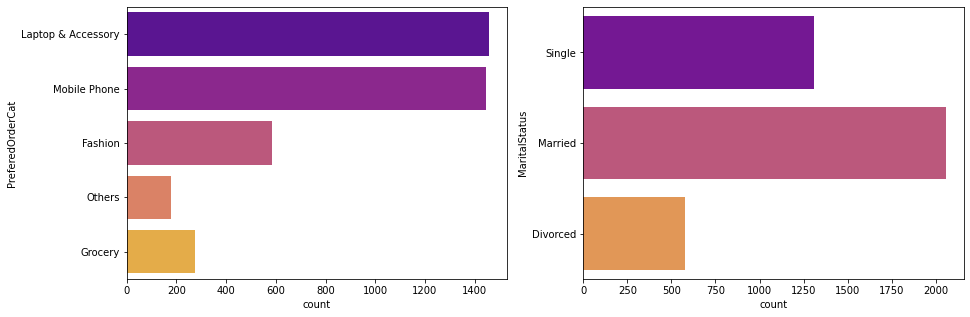

In [22]:
# melihat jumlah dari data kategorikal
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.countplot(data= df, y='PreferedOrderCat', ax=ax[0],  palette='plasma')
sns.countplot(data=df, y='MaritalStatus', ax=ax[1],  palette='plasma')
plt.show()

- kategori dari urutan yang paling banyak di order adalah 'laptop dan accessory', 'mobile phone', 'fashion', 'grocery', dan others
- status pernikahan customer yang terdaftar di platform dari urutan yang paling banyak adalah 'married', 'single'. dan 'divorced'

# Numerical feature (bivariate analysis)

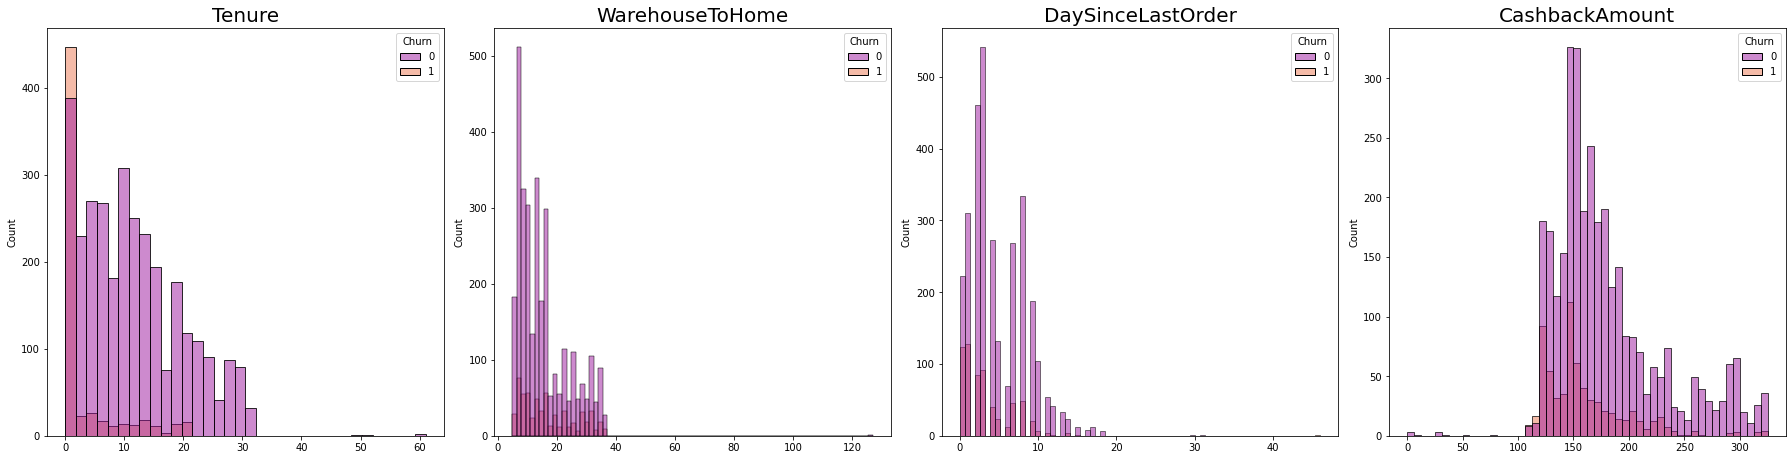

In [23]:
# melihat distribusi numerikal continuous berdasarkan kelas 0 dan 1
plt.figure(figsize=(25,25))
for i in range(0, len(dfkon)):
    plt.subplot(4,4,i+1)
    sns.histplot(x=df[dfkon[i]], palette='plasma', hue=df['Churn'])
    plt.title(dfkon[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

- 0 = tidak churn
- 1 = churn

- Tenure merupakan masa penggunaan platform e-commerce dari pertama mendaftar dalam satuan bulan. Customer yang churn banyak terjadi di bulan 0-2, dan customer yang tidak churn paling banyak juga terjadi di bulan 0-2. jumlah customer mengalami penurunan atau makin sedikit berdasarkan jumlah tenure yang makin banyak.
- WarehouseToHome merupakan jarak antara gudang dengan rumah customer. Terjadi penurunan frekuensi antara jumlah customer churn dan tidak churn yang jarak dari gudang ke rumahnya diatas 17KM dibandingkan jumlah customer yang memiliki jarak dari rumah ke gudang dibawah 17KM, sehingga dapat disimpulkan semakin jauh jarak gudang dengan rumah customer, maka dapat disimpulkan bahwa customer churn dan tidak churn tidak bergantung oleh jarak. Mungkin ada feature lain yang berkorelasi lebih kuat.
- DaySinceLastOrder pada customer churn dan tidak churn menunjukkan adanya data yang kosong. mungkin bisa disebabkan oleh missing value pada DaySinceLastOrder. Bila dilihat dari frekuensinya antara customer churn dan tidak churn sama sama mengalami fluktuatif naik turun dari hari ke hari. Maka dapat disimpulkan bahwa customer churn dan tidak churn tidak bergantung oleh DaySinceLastOrder. Mungkin ada feature lain yang berkorelasi lebih kuat.
- CashbackAmount pada customer churn dan tidak churn paling tinggi berada di sekitar 150. Frekuensi customer dengan banyak cashback berbanding terbalik artinya semakin banyak cashback yang didapat tidak mempengaruhi customer akan churn maupun tidak churn. Mungkin ada feature lain yang berkorelasi lebih kuat

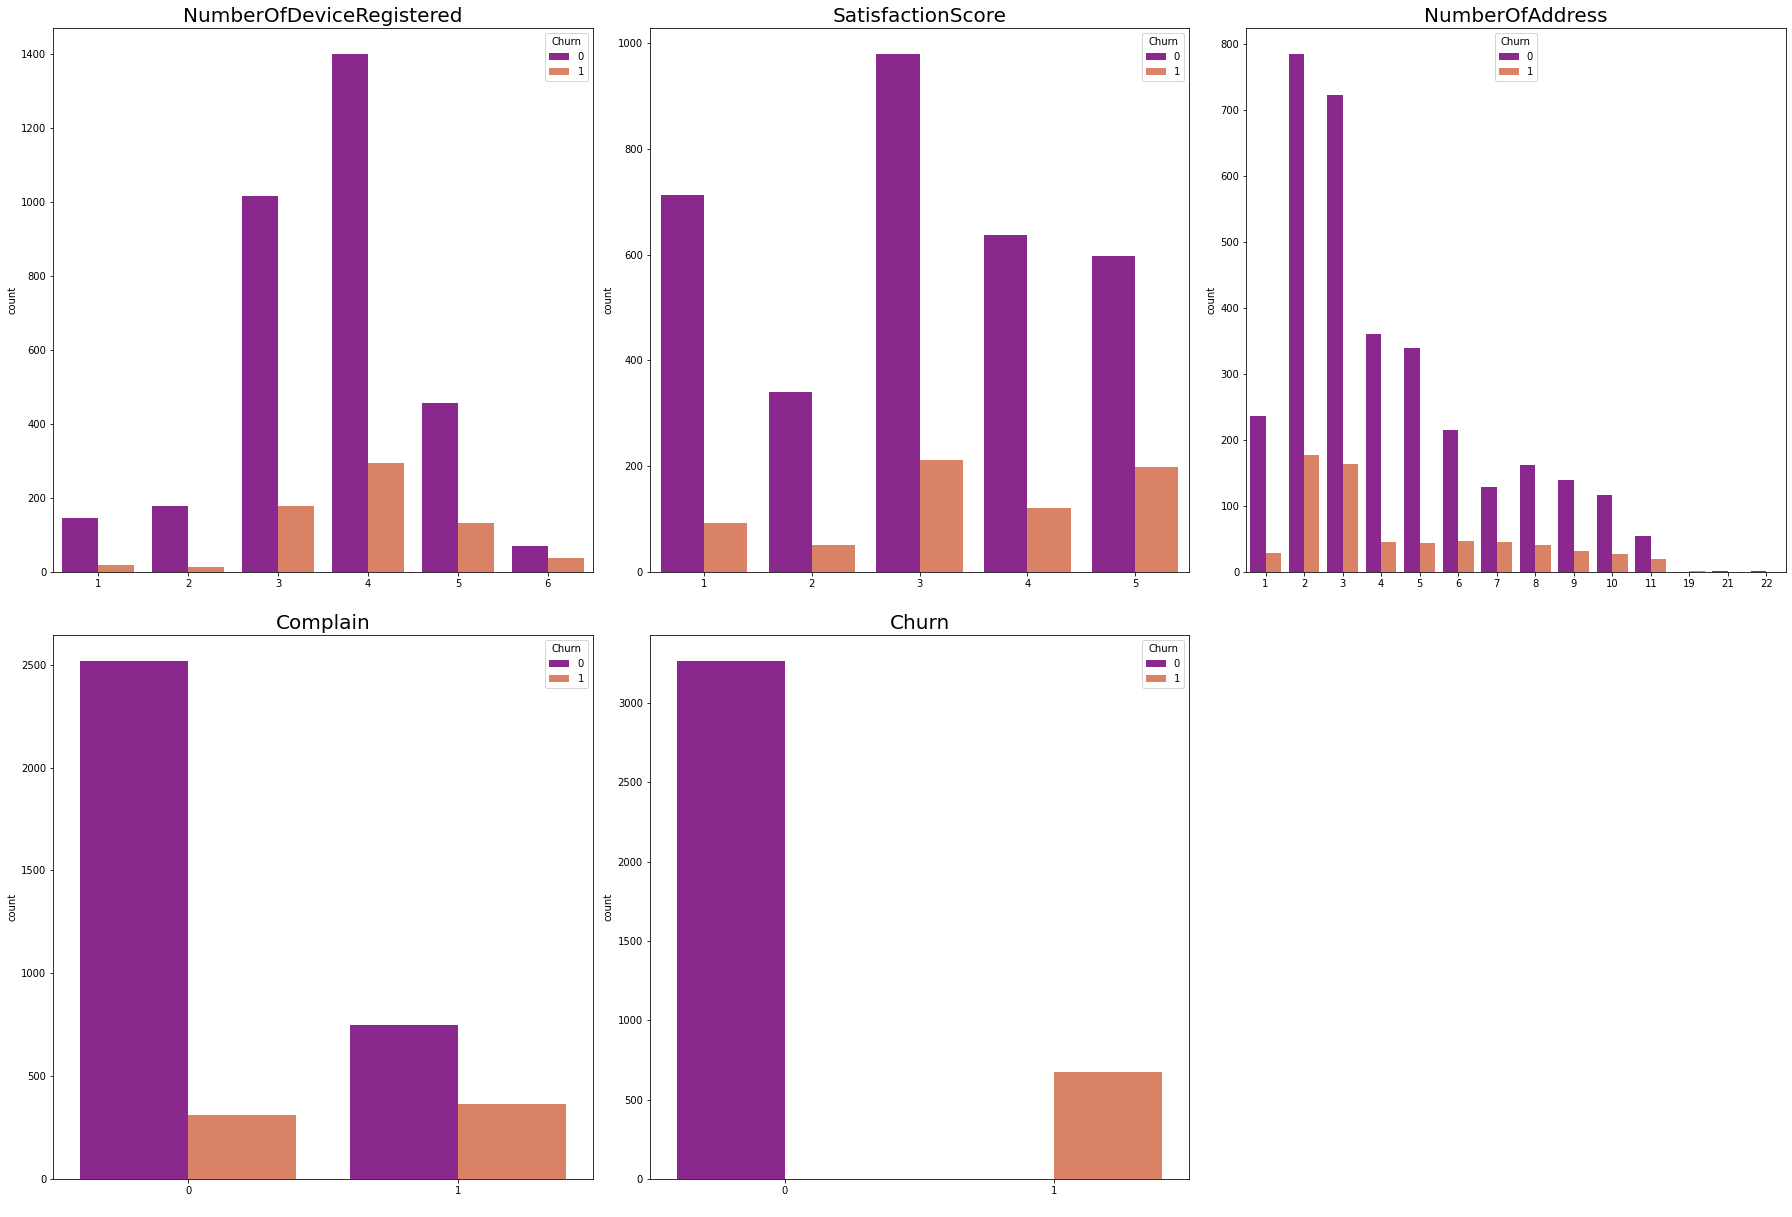

In [24]:
# melihat frekuensi dari data numerikal discrete
plt.figure(figsize=(25,25))
for i in range(0, len(dfdis)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[dfdis[i]], palette='plasma', hue=df['Churn'])
    plt.title(dfdis[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

- Jumlah customer churn dan tidak churn paling banyak memiliki 4 perangkat yang terhubung. dan fluktuasi nya juga naik turun yang menunjukkan bahwa jumlah perangkat tidak mempengaruhi jumlah semakin banyaknya customer churn maupun tidak churn. Maka dapat disimpulkan bahwa NumberOfDeviceRegistered bukan feature yang berkorelasi yang kuat dengan target/mempengaruhi customer akan churn atau tidak.
- Jumlah customer churn dan tidak churn paling banyak memberikan nilai kepuasan 3. dan fluktuasi nya juga naik turun. makin tinggi nilai kepuasan yag diberikan oleh customer tidak menjamin jumlah customer churn maupun tidak churn bertambah. Maka dapat disimpulkan bahwa statisfaction score bukan feature yang berkorelasi yang kuat dengan target/mempengaruhi customer akan churn atau tidak.
- Customer tidak churn lebih banyak memberikan 'tidak complain' dan customer yang churn lebih banyak memberikan 'complain'.

# Categorical feature (bivariate analysis)

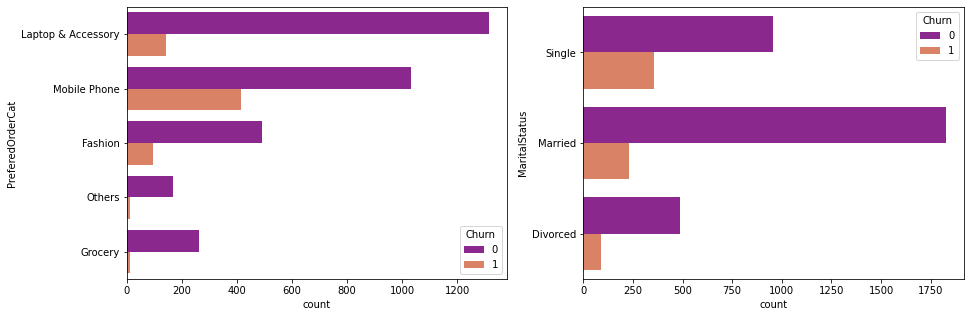

In [25]:
# melihat jumlah berdasarkan kelas 0 dan 1
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.countplot(data= df, y='PreferedOrderCat', ax=ax[0],  palette='plasma', hue='Churn')
sns.countplot(data=df, y='MaritalStatus', ax=ax[1],  palette='plasma', hue='Churn')
plt.show()

- kategori yang paling banyak diorder pada kelas 0 (tidak churn) adalah kategori laptop dan accessory.
- Status paling banyak pada kelas 0 (tidak churn) yaitu sudah menikah.
- kategori yang paling banyak diorder padda kelas 1 (churn) adalah kategori mobile phone.
- Status paling banyak pada kelas 1 (churn) adalah single.

# Correlation heatmap

<AxesSubplot:>

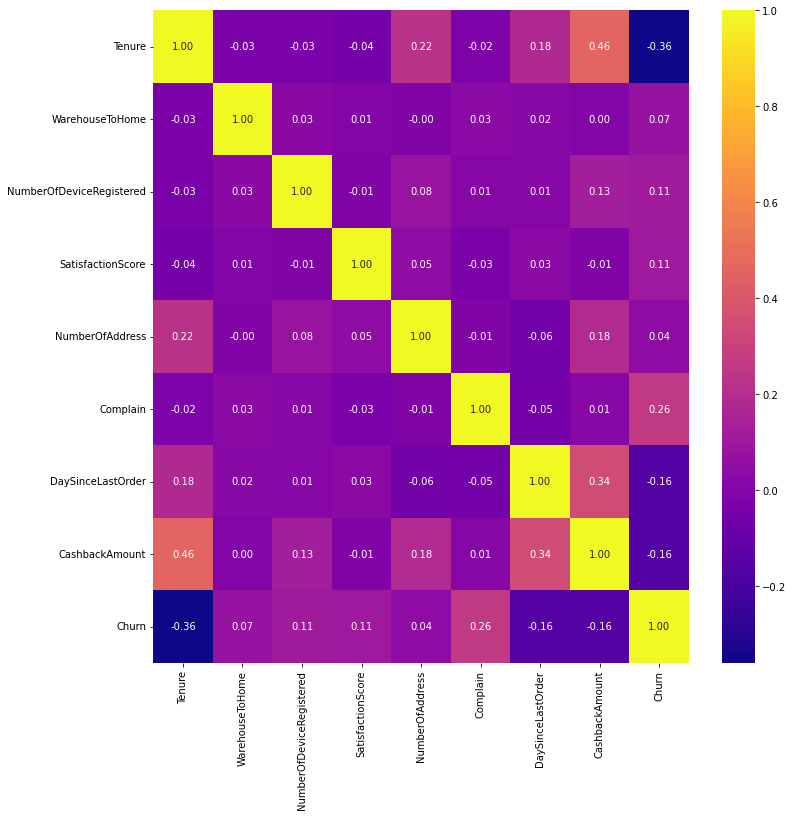

In [26]:
# heatmap untuk korelasi feature terhadap feature yang numerical

plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cmap='plasma', annot=True, fmt='.2f')

- Tidak ada korelasi yang paling kuat antara feature dengan feature.

<AxesSubplot:>

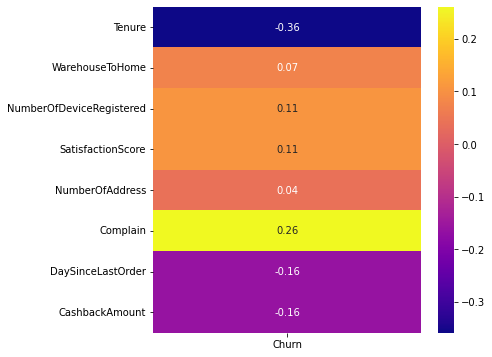

In [27]:
# heatmap untuk korelasi feature numerikal terhadap target
plt.figure(figsize=(6, 6))
sns.heatmap(df.corr()[df.corr().index != 'Churn'][['Churn']], cmap='plasma', annot=True, fmt='.2f')

- komplain memberikan pengaruh yang paling besar untuk customer melakukan churn dibandingkan features lainnya.

# MISSING VALUE HANDLING

In [28]:
# Mengganti blank value/value kosong agar dianggap sebagai missing value
df = df.replace('', np.nan, regex=True)

In [29]:
#melihat missing value dari features
listItem = []
for col in df.columns :
    listItem.append([col, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
]);

dfDesc = pd.DataFrame(columns=['feature', 'missing value', 'persen missing value'],
                     data=listItem)
dfDesc

,feature,missing value,persen missing value
0,Tenure,194,4.92
1,WarehouseToHome,169,4.29
2,NumberOfDeviceRegistered,0,0.00
3,PreferedOrderCat,0,0.00
4,SatisfactionScore,0,0.00
5,MaritalStatus,0,0.00
6,NumberOfAddress,0,0.00
7,Complain,0,0.00
8,DaySinceLastOrder,213,5.40
9,CashbackAmount,0,0.00


- Missing value terdapat pada feature 'Tenure', 'WarehouseToHome', dan 'DaySinceLastOrder' yang merupakan numerical feature dengan tipe float/continuous, dengan jumlah missing value pada masing-masing fitur memiliki persentase +-5%

In [30]:
#menampilkan baris yang mengandung NaN
df[df.isna().any(axis=1)]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
10,6.0,26.0,6,Fashion,3,Married,5,0,NaN,221.10,0
13,1.0,7.0,5,Fashion,3,Divorced,7,0,NaN,231.09,1
16,NaN,21.0,5,Mobile Phone,1,Married,1,1,3.0,121.68,0
27,0.0,NaN,1,Mobile Phone,3,Single,4,1,3.0,124.32,1
...,...,...,...,...,...,...,...,...,...,...,...
3900,0.0,NaN,4,Mobile Phone,1,Single,2,1,0.0,124.39,1
3904,2.0,28.0,2,Fashion,4,Married,8,0,NaN,219.96,0
3907,2.0,NaN,3,Mobile Phone,5,Divorced,8,1,2.0,124.04,1
3925,NaN,8.0,4,Mobile Phone,3,Single,2,0,2.0,120.44,1


- korelasi missing value

<AxesSubplot:>

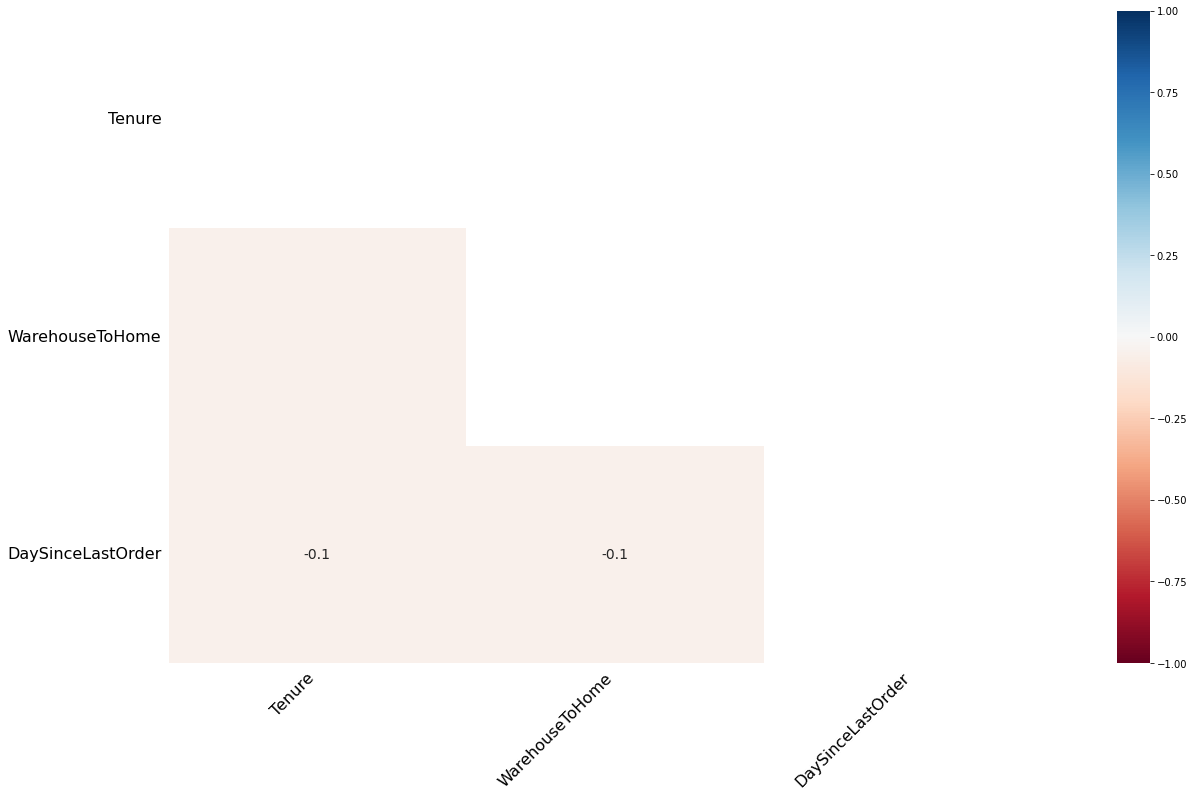

In [31]:
missingno.heatmap(df)

- Terdapat korelasi negatif antara missing value feature Tenure dan DaySinceLastOrder, jika di baris feature tenure ada missing valuenya maka di baris feature DaySinceLastOrder tidak ada missing valuenya. Begitu juga antara feature WarehouseToHome dan DaySinceLastOrder.

- matrix

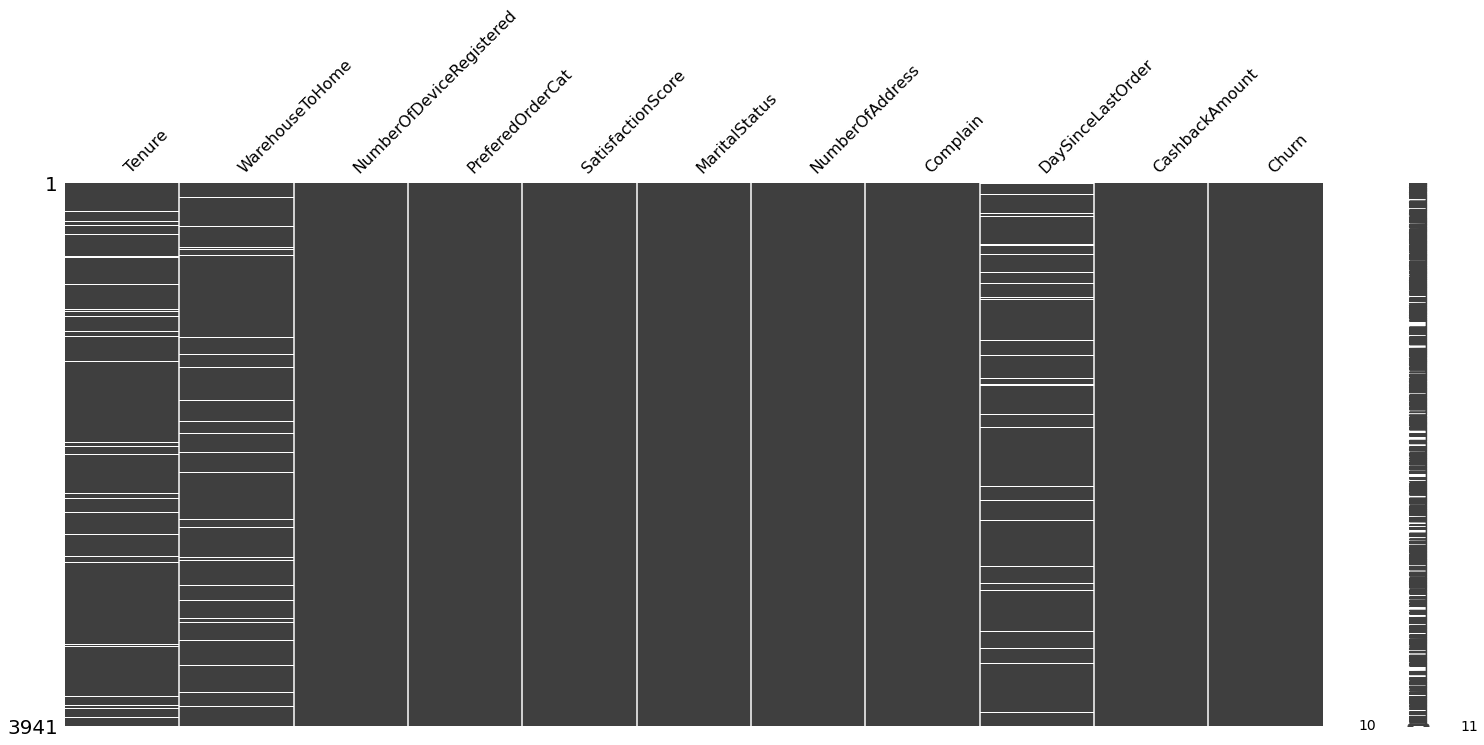

In [32]:
missingno.matrix(df)
plt.show()

- Missing value memiliki persebaran data general pattern. Jika di baris feature tenure ada missing valuenya maka di baris feature DaySinceLastOrder tidak ada missing valuenya. Begitu juga antara feature WarehouseToHome dan DaySinceLastOrder. Mari kita lihat berdasarkan sort by CashbackAmount, apakah missing value dipengaruhi oleh rendah tingginya cashback 

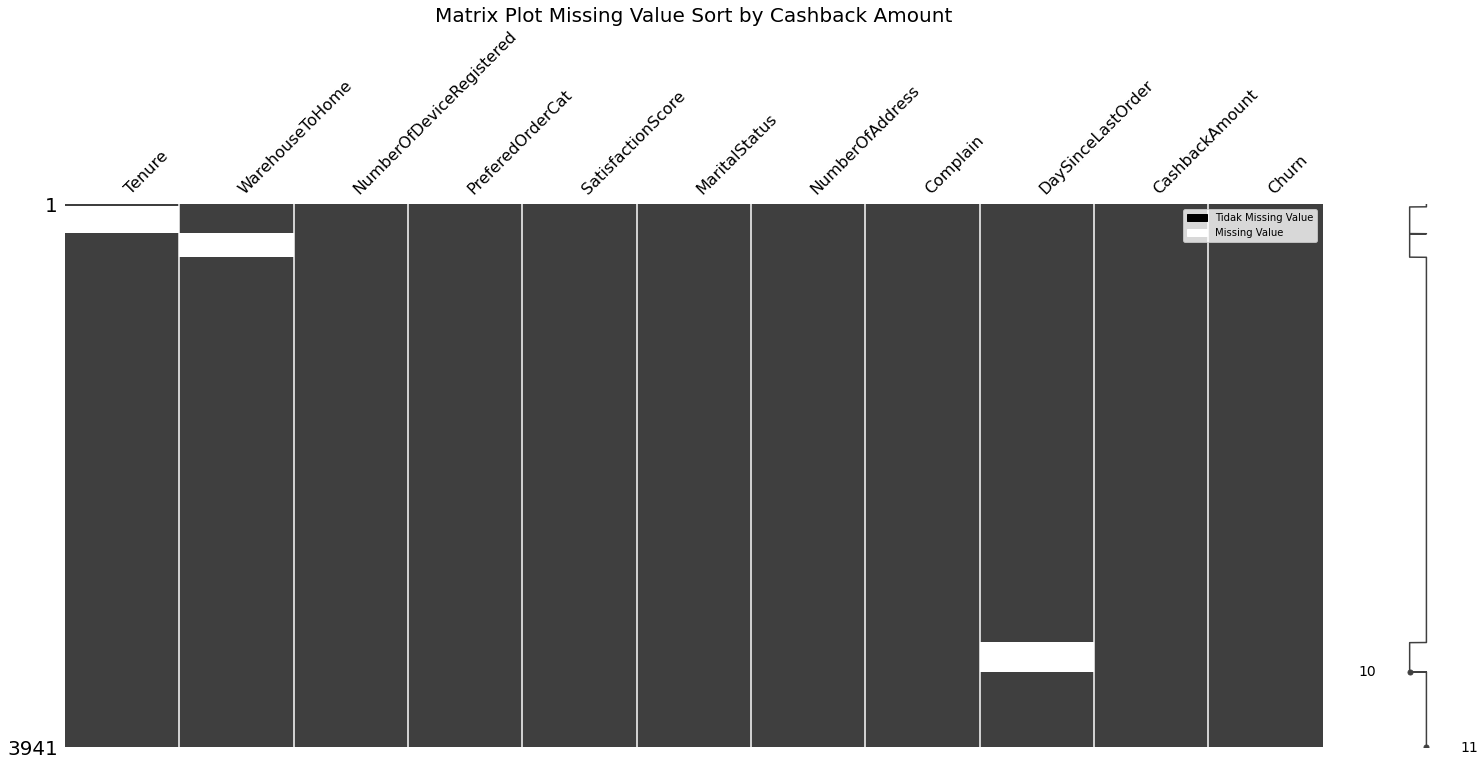

In [33]:
missingno.matrix(df.sort_values(by=['CashbackAmount'], axis=0, ascending=True))
gray_patch = mpatches.Patch(color='black', label='Tidak Missing Value')
white_patch = mpatches.Patch(color='white', label='Missing Value')
plt.legend(handles=[gray_patch, white_patch])
plt.title('Matrix Plot Missing Value Sort by Cashback Amount', fontsize=20)
plt.show()

- Missing value dipengaruhi oleh rendah tingginya cashback. Missing value pada kolom Tenure dan WarehouseToHome dipengaruhi oleh rendahnya cashback. Sedangkan missing value pada DaySinceLastOrder dipengaruhi oleh tingginya Cashback. Missing value seperti ini disebut tipe Missing at Random (MAR).

- dendogram

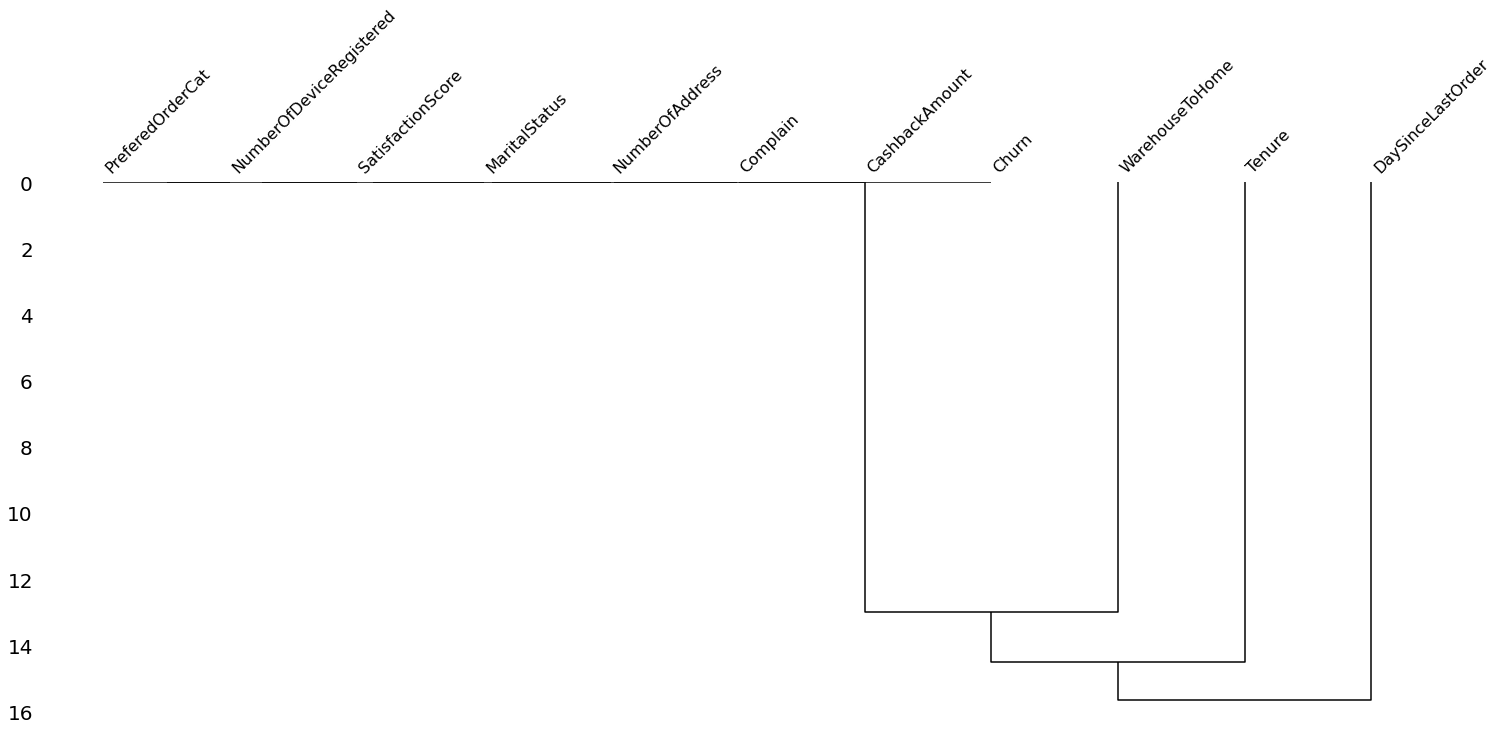

In [34]:
missingno.dendrogram(df)
plt.show()

- Ternyata betul, berdasarkan dendogram bahwa missing value pada featureDaySinceLastOrder, Tenure, dan WarehouseToHome memiliki hubungan atau dipengaruhi oleh feature CashbackAmount.

- kesimpulan missing value observation:

- Berdasarkan pengamatan missing value, missing value pada dataset ini merupakan tipe 'missing at random (MAR)'. Nilai yang hilang mungkin berhubungan pada nilai yang diketahui (variabel X) tetapi tidak pada variabel target (variabel Y) atau pada data yang hilang itu sendiri ( [missing data](https://www.scribbr.com/statistics/missing-data/) ). Disini dapat dilihat dari dendogram bahwa feature yang missing value memiliki hubungan dengan variabel X lain atau bisa dikatakan dengan feature lain yaitu CashbackAmount, dimana CashbackAmount ini tidak memiliki missing value dan bukan merupakan target.
- Untuk handle MAR, bisa dengan cara didrop, namun tidak saya lakukan karena data missing ada yang lebih dari 5% dan bila di drop data akan menjadi bias serta kehilangan banyak informasi penting ( [imputation method](https://www.analyticsvidhya.com/blog/2021/06/defining-analysing-and-implementing-imputation-techniques/) ). 
Serta bila dilihat dari grafik, feature 'Tenure', 'WarehouseToHome', dan 'DaySinceLastOrder' memiliki distribusi tidak normal/skew ke kanan (dilihat dari proses EDA). Maka missing value pada 'WarehouseToHome' akan saya isi dengan median. 'Tenure' dan 'DaySinceLastOrder' akan saya isi dengan nilai minimal.

In [35]:
# isi missing value 
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].min())
df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df['WarehouseToHome'].median())
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].min())

In [36]:
df.isna().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

# DUPLICATE VALUE HANDLING

In [37]:
# melihat data duplikat
df[df.duplicated(keep=False)]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
7,1.0,11.0,4,Mobile Phone,5,Single,3,0,1.0,154.73,1
8,11.0,12.0,4,Mobile Phone,3,Married,2,0,4.0,137.02,0
11,16.0,20.0,2,Laptop & Accessory,5,Married,7,0,1.0,180.38,0
25,18.0,26.0,3,Laptop & Accessory,3,Single,9,0,1.0,148.50,0
...,...,...,...,...,...,...,...,...,...,...,...
3930,22.0,17.0,3,Laptop & Accessory,1,Single,4,0,4.0,145.07,0
3932,20.0,15.0,5,Laptop & Accessory,5,Married,10,1,8.0,171.15,0
3934,10.0,25.0,3,Laptop & Accessory,3,Married,4,0,2.0,157.68,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0


In [38]:
print(f"Terdapat data duplikat sebanyak {df.duplicated().sum()} baris. Maka akan saya drop")

Terdapat data duplikat sebanyak 674 baris. Maka akan saya drop


In [39]:
# Cek dan hapus data duplikat
print(f"Data sebelumnya berjumlah {df.shape}, setelah data duplikat di drop menjadi {df.drop_duplicates().shape}")
df = df.drop_duplicates()

Data sebelumnya berjumlah (3941, 11), setelah data duplikat di drop menjadi (3267, 11)


# OUTLIER HANDLING

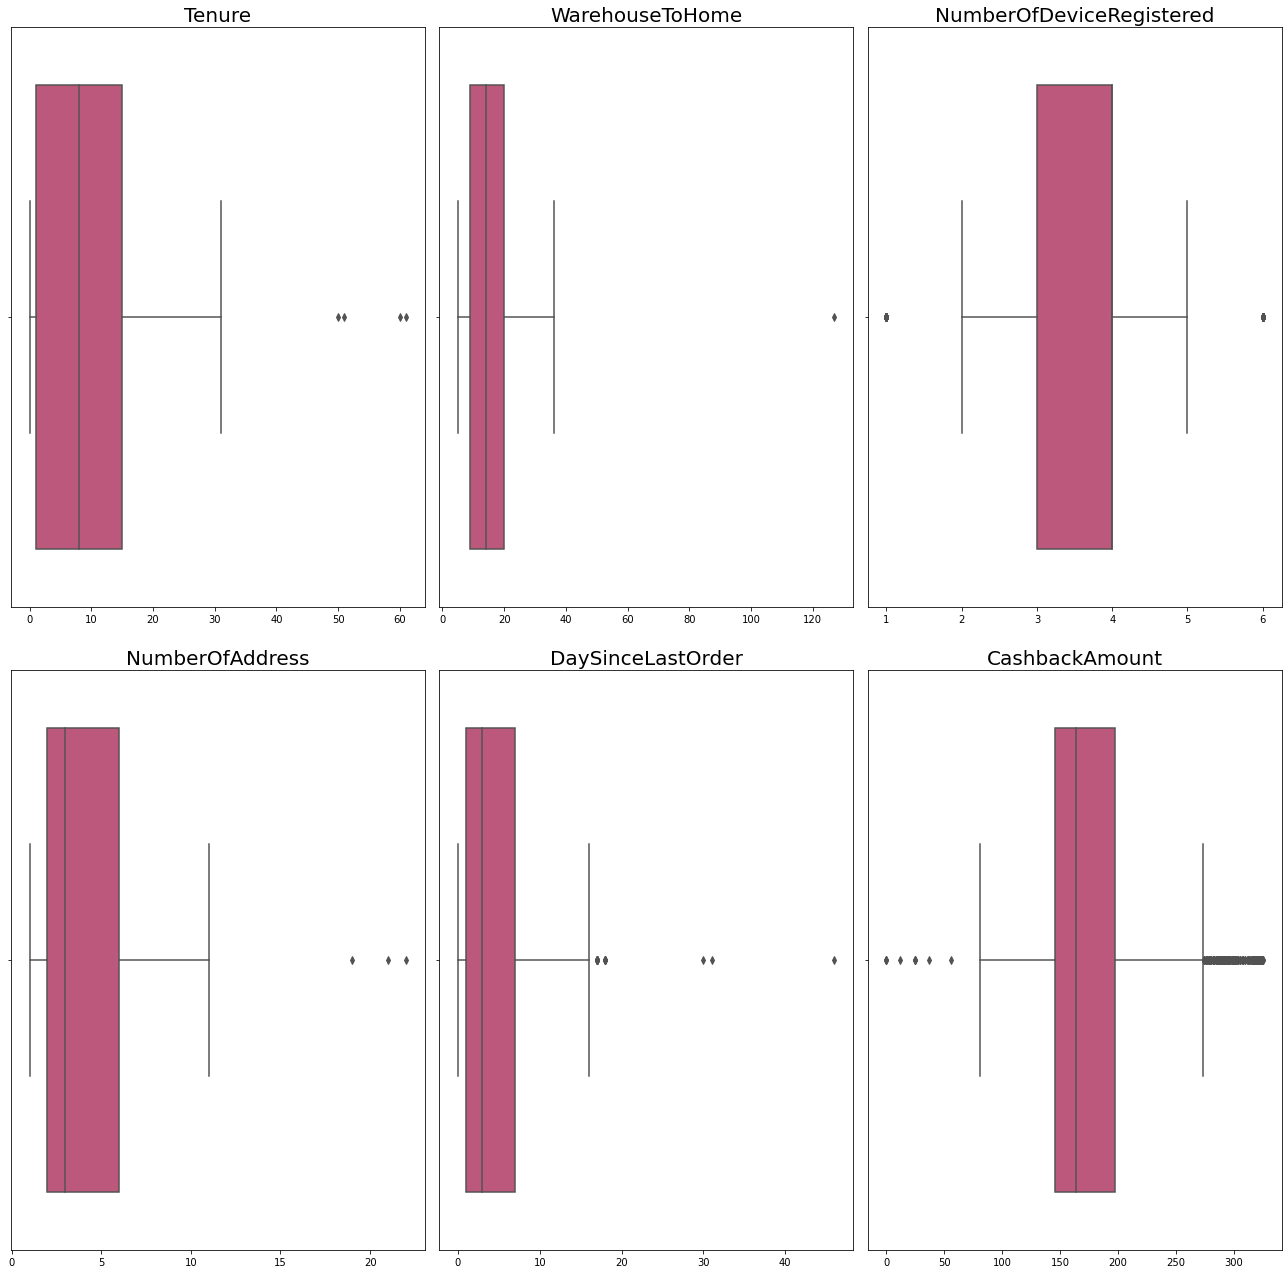

In [40]:
dfoutlier =['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']

plt.figure(figsize=(18,18))
for i in range(0, len(dfoutlier)):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=df[dfoutlier[i]], palette='plasma')
    plt.title(dfoutlier[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

In [41]:
# Melihat lower bound, upper bound
for i in range(0, len(dfoutlier)):
    Q1 = df[dfoutlier[i]].quantile(0.25)
    Q3 = df[dfoutlier[i]].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound =  Q1 - (1.5 * IQR)
    upper_bound =  Q3 + (1.5 * IQR)
    condition = (df[dfoutlier[i]]< lower_bound) | (df[dfoutlier[i]]> upper_bound)
    outlier = df.loc[condition, dfoutlier[i]].count()
    Persentase_outlier = outlier/df[dfoutlier[i]].count()*100
    print(f'''Lower Bound {dfoutlier[i]} adalah {round(lower_bound,2)}, dan Upper Bound {dfoutlier[i]} adalah {round(upper_bound,2)} , terdapat {outlier} data outlier''')
    '/n'

Lower Bound Tenure adalah -20.0, dan Upper Bound Tenure adalah 36.0 , terdapat 4 data outlier
Lower Bound WarehouseToHome adalah -7.5, dan Upper Bound WarehouseToHome adalah 36.5 , terdapat 1 data outlier
Lower Bound NumberOfDeviceRegistered adalah 1.5, dan Upper Bound NumberOfDeviceRegistered adalah 5.5 , terdapat 226 data outlier
Lower Bound NumberOfAddress adalah -4.0, dan Upper Bound NumberOfAddress adalah 12.0 , terdapat 3 data outlier
Lower Bound DaySinceLastOrder adalah -8.0, dan Upper Bound DaySinceLastOrder adalah 16.0 , terdapat 20 data outlier
Lower Bound CashbackAmount adalah 69.09, dan Upper Bound CashbackAmount adalah 273.97 , terdapat 255 data outlier


In [42]:
df[df['WarehouseToHome'] > 120]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
2717,26.0,127.0,4,Mobile Phone,1,Married,4,0,1.0,159.82,0


In [43]:
df[df['Tenure'] > 40]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
51,61.0,28.0,4,Grocery,1,Married,6,1,1.0,303.75,0
449,51.0,7.0,2,Laptop & Accessory,3,Divorced,2,0,9.0,174.00,0
1209,60.0,27.0,3,Grocery,1,Married,5,1,0.0,278.75,0
3778,50.0,6.0,1,Laptop & Accessory,3,Divorced,1,0,8.0,149.00,0


In [44]:
df[df['NumberOfAddress'] > 15]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
1581,0.0,10.0,3,Mobile Phone,2,Single,19,1,0.0,122.85,1
2109,13.0,16.0,4,Laptop & Accessory,4,Single,22,0,4.0,192.82,0
3494,12.0,15.0,3,Laptop & Accessory,4,Single,21,0,3.0,167.82,0


In [45]:
df[df['NumberOfDeviceRegistered'] > 5]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
6,1.0,15.0,6,Mobile Phone,5,Divorced,3,0,2.0,149.51,0
10,6.0,26.0,6,Fashion,3,Married,5,0,0.0,221.10,0
65,1.0,31.0,6,Mobile Phone,1,Single,3,1,1.0,148.40,1
103,14.0,7.0,6,Laptop & Accessory,1,Married,4,1,3.0,199.57,0
118,5.0,9.0,6,Mobile Phone,1,Married,6,1,1.0,152.78,1
...,...,...,...,...,...,...,...,...,...,...,...
3715,8.0,10.0,6,Laptop & Accessory,5,Single,5,0,13.0,172.59,0
3756,1.0,15.0,6,Mobile Phone,5,Divorced,3,1,8.0,146.19,1
3806,1.0,29.0,6,Mobile Phone,3,Married,3,0,1.0,140.55,1
3807,18.0,31.0,6,Mobile Phone,3,Single,4,0,5.0,162.08,0


In [46]:
df[df['NumberOfDeviceRegistered'] <2]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
19,0.0,18.0,1,Mobile Phone,4,Single,2,0,0.0,127.16,1
22,30.0,9.0,1,Mobile Phone,5,Married,5,1,0.0,126.70,0
27,0.0,14.0,1,Mobile Phone,3,Single,4,1,3.0,124.32,1
30,12.0,6.0,1,Fashion,1,Married,1,0,7.0,196.13,0
95,0.0,30.0,1,Mobile Phone,5,Single,2,0,0.0,110.91,1
...,...,...,...,...,...,...,...,...,...,...,...
3854,5.0,13.0,1,Mobile Phone,4,Married,2,0,3.0,127.94,0
3871,7.0,14.0,1,Mobile Phone,3,Married,1,0,0.0,125.85,0
3875,18.0,6.0,1,Others,1,Married,1,0,7.0,292.02,0
3914,17.0,10.0,1,Others,5,Married,2,0,13.0,291.90,0


In [47]:
df[df['DaySinceLastOrder'] >  14.5]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
169,17.0,34.0,3,Grocery,5,Divorced,4,0,17.0,263.28,0
181,3.0,11.0,3,Mobile Phone,5,Married,6,0,30.0,132.04,0
235,18.0,35.0,4,Grocery,5,Married,5,0,18.0,288.28,0
256,29.0,21.0,2,Others,4,Single,10,0,16.0,312.22,0
486,13.0,7.0,3,Grocery,5,Married,3,0,16.0,268.23,0
547,16.0,11.0,4,Others,2,Divorced,3,0,16.0,317.32,0
739,25.0,9.0,4,Grocery,5,Divorced,2,0,16.0,268.56,0
800,15.0,13.0,4,Mobile Phone,5,Single,4,1,18.0,172.21,0
891,17.0,13.0,4,Fashion,1,Married,4,0,17.0,202.48,0
1339,14.0,12.0,3,Mobile Phone,5,Single,3,1,17.0,147.21,0


In [48]:
df[df['CashbackAmount'] > 274.0]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
43,17.0,21.0,4,Grocery,5,Married,8,0,1.0,296.59,0
51,61.0,28.0,4,Grocery,1,Married,6,1,1.0,303.75,0
101,19.0,21.0,3,Others,4,Married,6,0,3.0,290.81,0
104,15.0,9.0,4,Grocery,5,Divorced,9,0,9.0,290.95,0
...,...,...,...,...,...,...,...,...,...,...,...
3860,17.0,21.0,4,Grocery,5,Divorced,8,0,1.0,296.59,0
3867,13.0,16.0,4,Others,1,Single,4,0,4.0,319.31,0
3875,18.0,6.0,1,Others,1,Married,1,0,7.0,292.02,0
3914,17.0,10.0,1,Others,5,Married,2,0,13.0,291.90,0


In [49]:
df[df['CashbackAmount'] < 69.04]	

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
122,0.0,12.0,3,Mobile Phone,1,Married,2,1,2.0,56.0,0
666,6.0,21.0,3,Laptop & Accessory,1,Married,1,1,1.0,12.0,0
862,11.0,11.0,4,Mobile Phone,2,Married,6,0,9.0,25.0,0
1230,8.0,24.0,3,Laptop & Accessory,5,Married,1,0,4.0,0.0,0
1885,9.0,25.0,4,Laptop & Accessory,5,Married,2,0,5.0,25.0,0
2399,7.0,22.0,4,Laptop & Accessory,1,Married,2,1,2.0,37.0,0
2498,10.0,10.0,3,Mobile Phone,2,Married,5,0,8.0,0.0,0
2754,1.0,33.0,5,Laptop & Accessory,5,Married,1,0,0.0,0.0,0
3269,2.0,34.0,6,Laptop & Accessory,5,Married,2,0,1.0,25.0,0


- feature 'Tenure', 'WarehouseToHome', dan 'numberOfAddress' akan saya drop karena jumlah outlier yang sedikit. 'NumberOfDeviceRegistered', 'DaySinceLastOrder', dan 'CashbackAmount' tidak akan saya drop karena jumlah outliernya banyak.

In [50]:
# drop outlier pada feature WarehouseToHome, Tenure dan NumberOfAddress
df.drop(df[df['Tenure']>37].index,inplace=True)
df.drop(df[df['WarehouseToHome']>36.5].index,inplace=True)
df.drop(df[df['NumberOfAddress']>12].index,inplace=True)

In [51]:
# Cek ulang jumlah baris setelah di dropoutlier
print(f"Data setelah di drop outlier berjumlah {df.shape}")

Data setelah di drop outlier berjumlah (3259, 11)


# Feature engineering

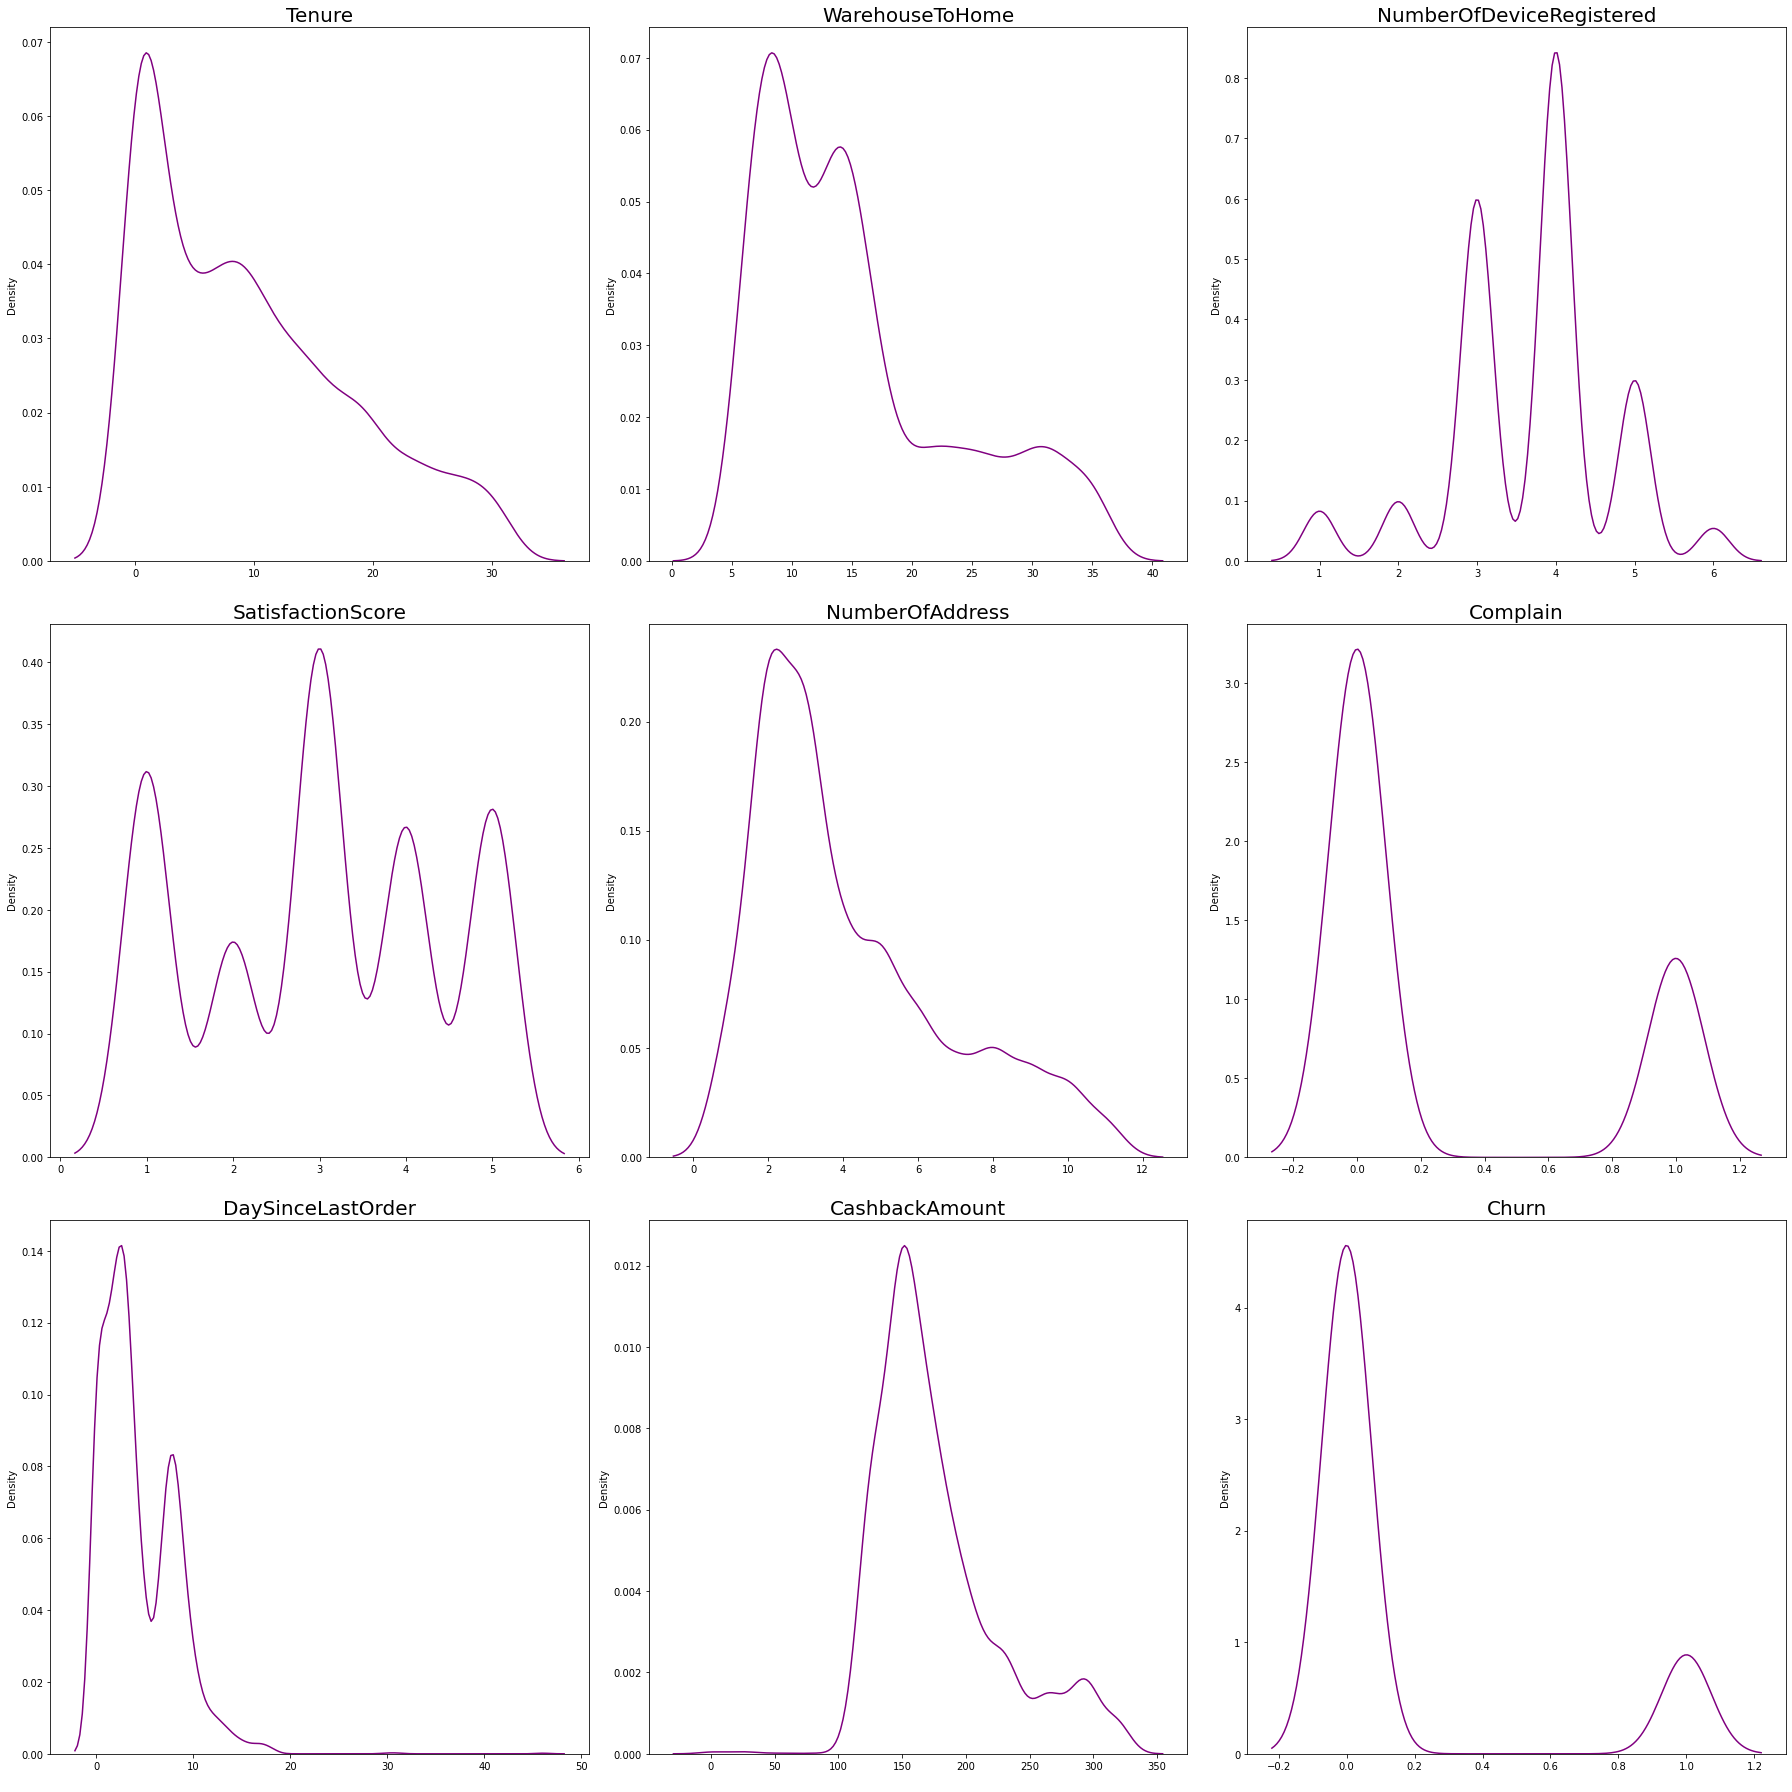

In [52]:
# melihat distribusi data 
plt.figure(figsize=(25,25))
for i in range(0, len(dfnum)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x=df[dfnum[i]], color='purple')
    plt.title(dfnum[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

- semua feature numerikal memiliki distribusi yang right skewed maka saya akan transform menjadi distribusi data normal agar diharapkan bisa mendapatkan hasil yang lebih akurat [referensi1](https://towardsdatascience.com/types-of-transformations-for-better-normal-distribution-61c22668d3b9) [referensi2](https://machinelearningmastery.com/how-to-transform-data-to-fit-the-normal-distribution/) [referensi3](https://www.youtube.com/watch?v=U_wKdCBC-w0) [referensi4](https://medium.com/analytics-vidhya/techniques-to-transform-data-distribution-565a4d0f2da)

In [53]:
# mengubah distribusi yang right skewed jadi normal 
for i in dfnum[:8]:
    df[i] = np.log1p(df[i])

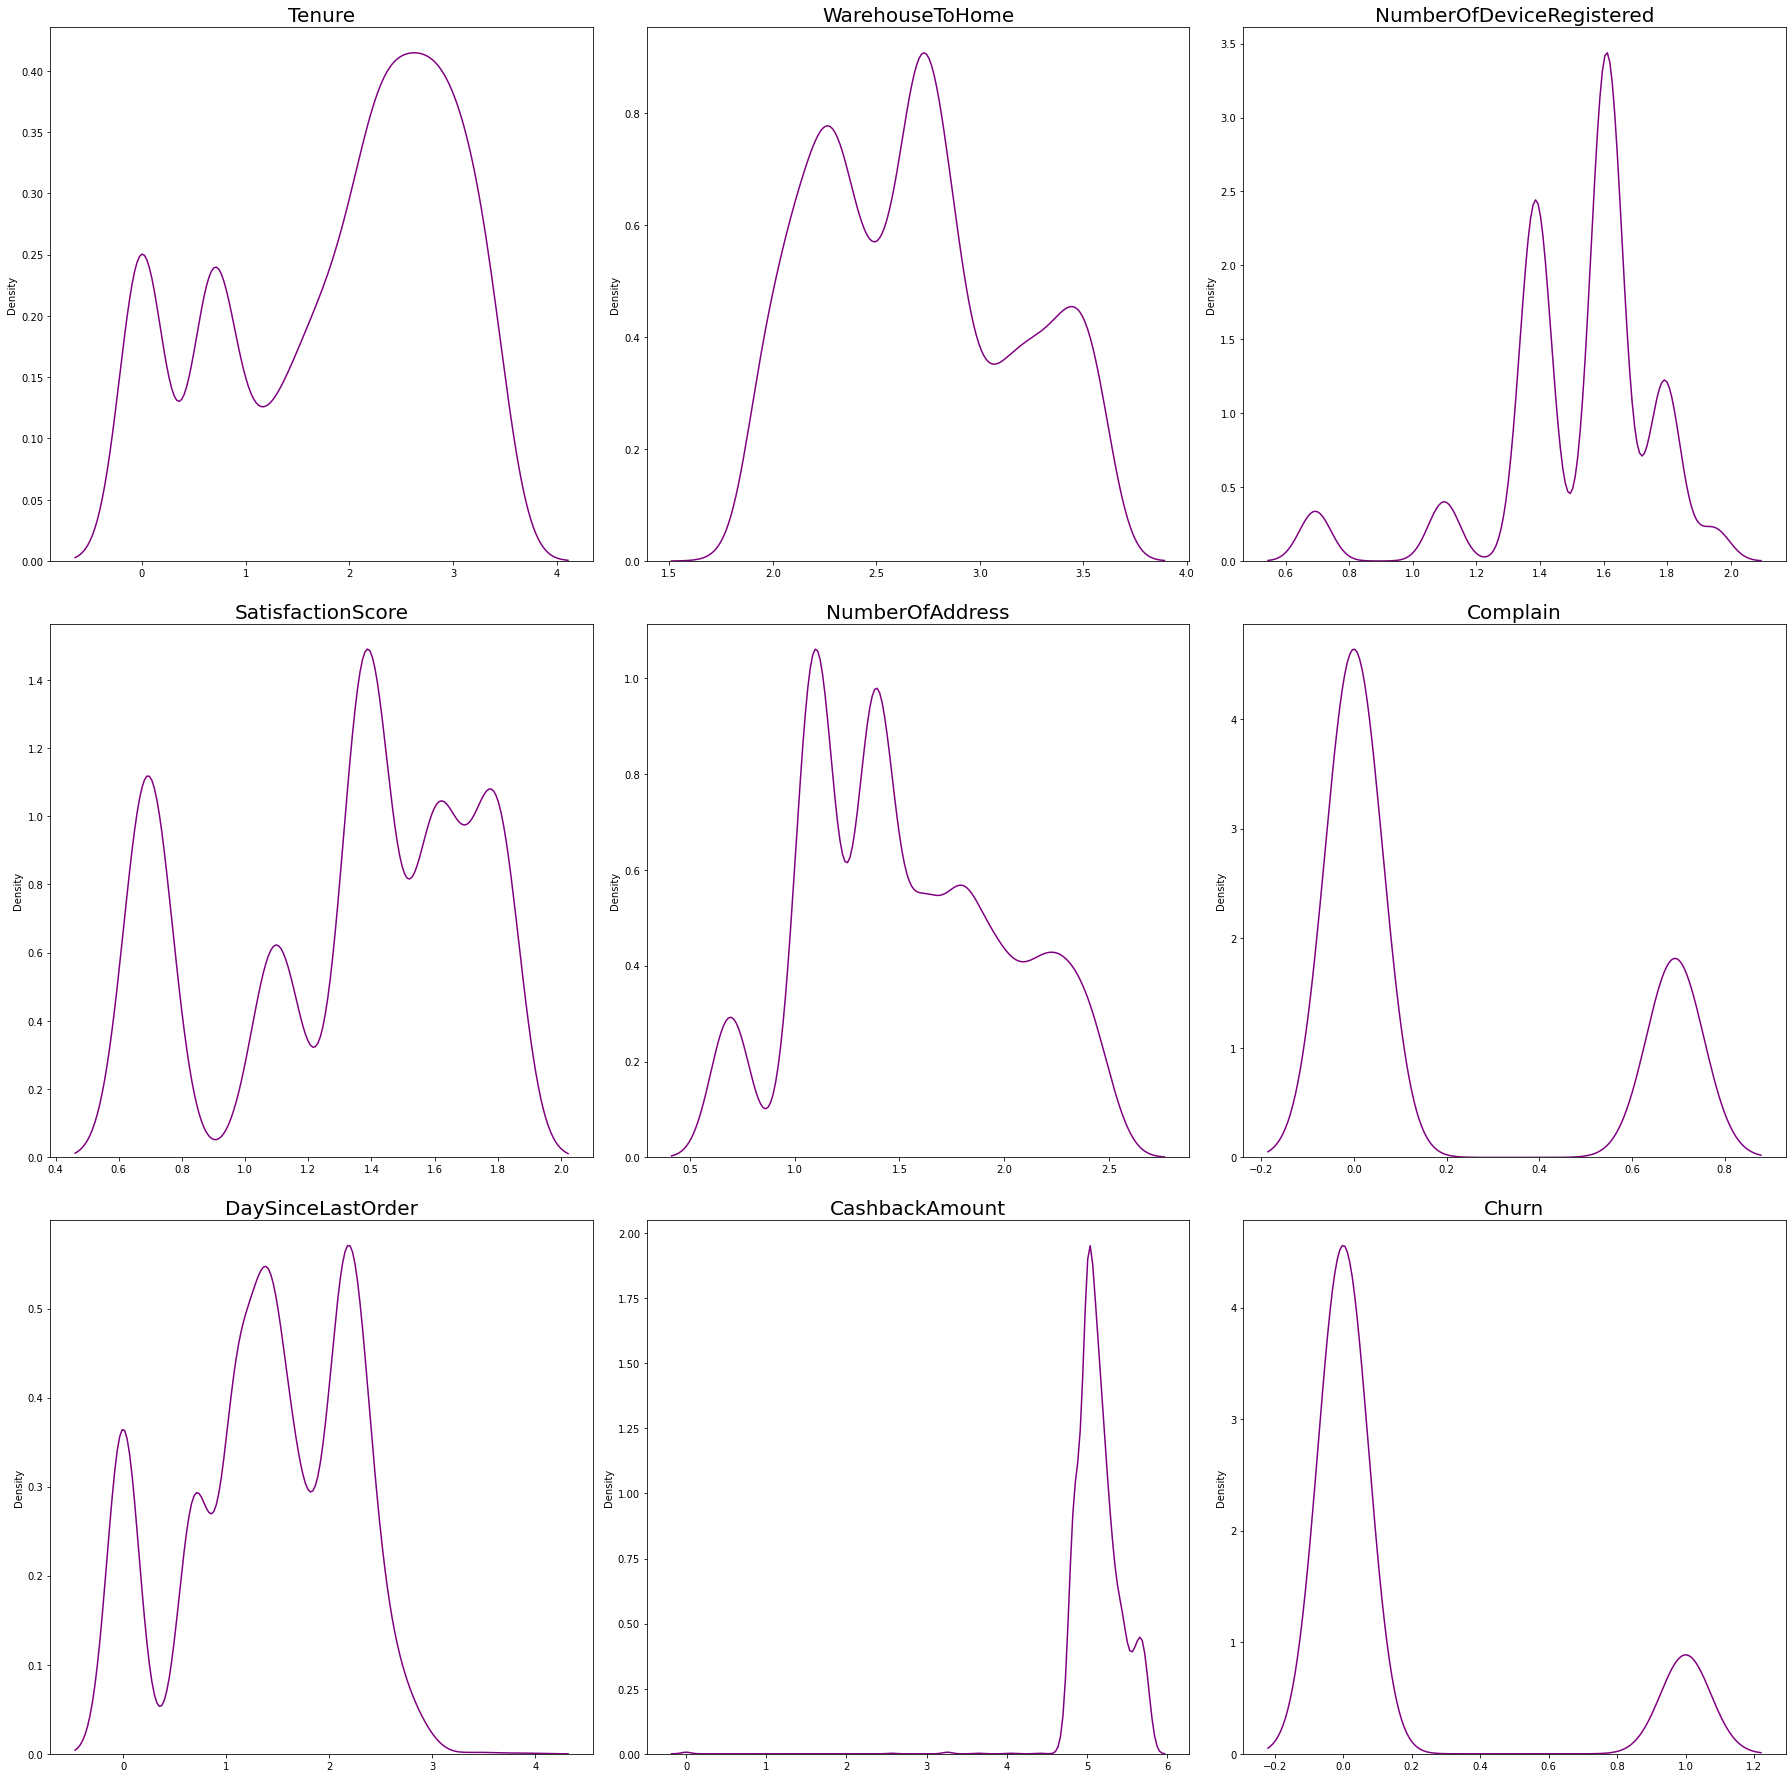

In [54]:
plt.figure(figsize=(25,25))
for i in range(0, len(dfnum)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x=df[dfnum[i]],color='purple')
    plt.title(dfnum[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

### Perlunya Transformasi Data!!
- Untuk lebih mendekati distribusi teoretis yang memiliki sifat statistik yang bagus
- Untuk menyebarkan data lebih merata -untuk membuat distribusi data lebih simetris
- Untuk membuat hubungan antar variabel lebih linier
- Untuk membuat data memiliki varians yang lebih konstan (homoscedastic)

### Pentingnya Transformasi Distribusi Data
- Algoritma machine learning diharapkan dapat memberikan hasil (prediksi) yang lebih baik ketika data numerikal yang ada terdistribusi secara normal.
Untuk membuat fungsi biaya meminimalkan kesalahan prediksi dengan lebih baik

### Sumber:
- https://medium.com/analytics-vidhya/techniques-to-transform-data-distribution-565a4d0f2da
- https://www.youtube.com/watch?v=U_wKdCBC-w0

In [55]:
# check descriptive statistic
df[dfnum[:8]].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,3259.0,1.905035,1.084857,0.000000,0.693147,2.197225,2.772589,3.465736
WarehouseToHome,3259.0,2.683623,0.472085,1.791759,2.302585,2.708050,3.044522,3.610918
NumberOfDeviceRegistered,3259.0,1.514929,0.249620,0.693147,1.386294,1.609438,1.609438,1.945910
SatisfactionScore,3259.0,1.322201,0.388419,0.693147,1.098612,1.386294,1.609438,1.791759
NumberOfAddress,3259.0,1.536823,0.472888,0.693147,1.098612,1.386294,1.945910,2.484907
Complain,3259.0,0.195034,0.311735,0.000000,0.000000,0.000000,0.693147,0.693147
DaySinceLastOrder,3259.0,1.395704,0.783762,0.000000,0.693147,1.386294,2.079442,3.850148
CashbackAmount,3259.0,5.146045,0.303634,0.000000,4.989786,5.105279,5.288974,5.786867


- Data imbalance sehingga perlu dilakukannya resampling. Metode resampling yang digunakan adalah SMOTE yaitu menambah data pada kelas minoritas. Pendekatan ini bekerja dengan membuat replikasi dari data minoritas. Replikasi tersebut dikenal dengan data sintetis (syntetic data). Metode SMOTE bekerja dengan mencari k nearest neighbors (yaitu ketetanggaan terdekat data sebanyak k) untuk setiap data di kelas minoritas, setelah itu dibuat data sintetis sebanyak presentase duplikasi yang diinginkan antara data minor dan knearest neighbors yang dipilih secara acak. [smote](file:///C:/Users/M70.DESKTOP-HPG2EEQ/Downloads/177-1-363-2-10-20180209%20(1).pdf)
- Saya merasa FN dan FP sama-sama penting, maka sebisa mungkin yang akan saya lakukan adalah membuat model yang dapat membuat customer tidak berkurang/hilang tanpa membuat biaya pemasaran sia-sia. Saya perlu meminimalisir bagian False Negative Rate. Jika model gagal dalam meminimalkan False Negative Rate (Type 1 error), artinya customer yang harusnya churn diprediksi oleh model sebagai customer tidak churn. Jika ini terjadi, maka perusahaan akan mengalami kehilangan customer sehingga mempengaruhi pendapatan perusahaan itu sendiri. Namun, saya juga harus memperhatikan angka False Positive (Type 2 error) pada hasil prediksi. Jika tinggi, berarti model salah memprediksi customer yang tidak churn. Ini akan menyebabkan biaya yang terbuang sia-sia karena customer yang padahal tidak akan churn namun diprediksi churn. Maka model yang saya cari adalah model yang memberikan prediksi akurat pada kelas positif dengan nilai recall setinggi mungkin untuk menghindari kehilangan customer berpotensi loyal diikuti dengan nilai precision yang juga harus sama tingginya untuk menghindari terbuangnya biaya yang dialokasikan. Maka saya harus menyeimbangkan antara precision dan recall dari 1 kelas positif. Maka metric yang akan saya gunakan adalah F1-Score. [referensi](https://stevkarta.medium.com/membicarakan-precision-recall-dan-f1-score-e96d81910354)
- Scaling menggunakan robust scaler, untuk mengubah Q1 dan Q3 rentangnya 1 dan mediannya ke 0. Cocok untuk data yang memiliki outlier.  Tujuannya agar tahan terhadap pencilan data (outliers). [referensi](https://medium.com/@uulwake/apa-pentingnya-scaling-data-di-machine-learning-91ba0caf1a43)

In [56]:
# scaler
scaler = RobustScaler()

In [57]:
# sampling untuk menambah data pada kelas minoritas
sm = SMOTE(random_state=0)

# DATA PREPROCESSING

### Encoding
Mengubah kategorikal menjadi numerikal pada feature PreferedOrderCat dan MaritalStatus menggunakan one hot encoding karena unique value pada MaritalStatus hanya berjumlah 3 dan unique value pada PreferedOrderCat berjumlah 5 saja. Serta kedua feature tersebut tidak memiliki tingkatan

In [58]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['MaritalStatus','PreferedOrderCat'])
], remainder='passthrough')

## Define X dan y

In [60]:
# define feature dan target
X = df.drop('Churn', axis=1)
y = df['Churn']

## Data splitting

Data splitting dengan train test split yang bertujuan untuk mengevaluasi performa model machine learning. Data train 80% dan data test 20% dengan random state 0, dan stratify y yang bertujuan untuk memastikan kedua data memiliki proporsi semua target(churn).

In [61]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    stratify=y,
    test_size=0.2,
    random_state=0
)

In [62]:
testing = pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names())
testing.head()

,onehot__x0_Married,onehot__x0_Single,onehot__x1_Grocery,onehot__x1_Laptop & Accessory,onehot__x1_Mobile Phone,onehot__x1_Others,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
0,1.0,0.0,0.0,1.0,0.0,0.0,3.044522,3.044522,1.386294,1.386294,1.609438,0.693147,1.098612,4.989820
1,0.0,0.0,0.0,0.0,1.0,0.0,1.609438,2.708050,1.609438,1.386294,1.609438,0.000000,1.098612,4.822618
2,1.0,0.0,0.0,1.0,0.0,0.0,2.944439,2.197225,1.386294,1.386294,1.791759,0.000000,2.079442,5.027427
3,0.0,0.0,0.0,1.0,0.0,0.0,0.693147,2.397895,1.609438,1.791759,1.386294,0.693147,1.609438,5.123607
4,1.0,0.0,0.0,1.0,0.0,0.0,2.708050,3.526361,1.609438,1.791759,1.386294,0.000000,1.945910,5.346917


## Model Benchmark

In [63]:
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
xgb = XGBClassifier()

In [64]:
models = [logreg, knn, dt, rf, xgb]

score=[]
rata=[]
std=[]

for i in models:
    skfold = StratifiedKFold(n_splits=5)
    estimator = Pipeline([
        ('transformer', transformer),
        ('scaler', scaler),
        ('balancing', sm),
        ('model', i)
    ])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='f1',n_jobs=-1)
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],'mean f1':rata,'sdev':std}).set_index('model').sort_values(by='mean f1',ascending=False)

,mean f1,sdev
model,,
XGBoost,0.700082,0.017264
Random Forest,0.685943,0.036675
Decision Tree,0.598398,0.041608
Logistic Regression,0.579157,0.016179
KNN,0.545209,0.023648


Pada hasil diatas dapat dilihat bahwa model terbaik dengan hyperparameter default adalah XGBoost dan Random Forest dengan nilai rata-rata f1 score masing-masing 0.700 dan 0.685. saya akan coba implementasi pada data test untuk semua model.

## Model Benchmarking: Test Data

In [65]:
models = [logreg,knn,dt,rf,xgb]
score_f1 = []

def y_pred_func(i):
    estimator=Pipeline([
        ('transformer', transformer),
        ('scaler', scaler),
        ('balancing', sm),
        ('model', i)])
    X_train,X_test
    
    estimator.fit(X_train,y_train)
    return(estimator,estimator.predict(X_test),X_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']):
    estimator,y_pred,X_test = y_pred_func(i)
    score_f1.append(fbeta_score(y_test,y_pred,pos_label=1,beta=1))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],
             'f1 score':score_f1}).set_index('model').sort_values(by='f1 score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.97      0.80      0.88       546
           1       0.46      0.86      0.60       106

    accuracy                           0.81       652
   macro avg       0.71      0.83      0.74       652
weighted avg       0.88      0.81      0.83       652

KNN 
               precision    recall  f1-score   support

           0       0.95      0.81      0.88       546
           1       0.45      0.80      0.58       106

    accuracy                           0.81       652
   macro avg       0.70      0.81      0.73       652
weighted avg       0.87      0.81      0.83       652

Decision Tree 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       546
           1       0.58      0.68      0.62       106

    accuracy                           0.87       652
   macro avg       0.76      0.79      0.77       652
weighted avg       0.88      0

,f1 score
model,
XGBoost,0.720379
Random Forest,0.719626
Decision Tree,0.623377
Logistic Regression,0.596721
KNN,0.576271


### LogReg
Jika melihat hasil score f1 score antara data train dan data test yaitu 0,57 dan 0,59. Model ini menghasilkan f1 score yang tidak terlalu bagus, hanya sekitar 0.60 dengan performa Precision yang rendah. Model Logistic Regression sangat sensitif dengan multicollinearity karena akan menyebabkan penurunan pada nilai precision. Oleh karena itu, nilai f1-score pun ikut menurun.
### KNN
hasil score f1 antara training dan testing lumayan memiliki jarak yang jauh yaitu 0,54 dan 0,57. Dapat disimpulkan bahwa penggunaan model KNN menyebabkan sedikit overfitting. Semakin tinggi nilai n_neighbours yang dimasukkan, semakin rendah nilai Recall sehingga mempengaruhi nilai f1-score
### DecTree
Jika melihat hasil nilai f1 score antara train set dan test set yaitu 0,59 dan 0,62, dapat disimpulkan bahwa penggunaan model Decision Tree mengalami sedikit overfitting. Disini nilai precisionnya dikategorikan masih rendah yang dapat diartikan bahwa nilai False Positive yang tinggi. model Decision Tree mungkin tidak terlalu optimal dalam menangani dataset ini.
### RF
Random Forest adalah teknik Bagging yang terdiri dari sejumlah model decision tree pada berbagai kelompok dari dataset yang ada. Berbeda dengan Decision Tree yang hanya memiliki satu pohon keputusan, Random Forest menghasilkan prediksi dari setiap pohon keputusan yang ada dan mengambil nilai prediksi yang paling banyak dipilih sebagai hasil terakhir. f1 score pada training dan testing yaitu 0,68 dan 0,71. Namun nilainya bisa dibilang tidak terlalu tinggi yang berada di nilai 0.72 dengan performa Precision yang tidak terlalu tinggi yaitu 0.71.
### XGBoost
hasil f1-score pada test set yang berada di angka 0.72 lebih tinggi dari train set yaitu 0.70. Nilai pada Precision dan Recall juga tinggi dan seimbang yang artinya jika Precision bernilai lebih tinggi berarti algoritma pada model tersebut mampu memprediksi hasil yang lebih relevan daripada yang tidak relevan, dan nilai Recall yang tinggi berarti suatu algoritma pada model mampu memprediksi kelas positif dengan akurat.

Sehingga step selanjutnya adalah meningkatkan performa dengan melakukan hyperparameter tuning pada model XGBoost dan Random Forest dan membandingkan performanya.

# Hyperparameter Tuning
Hyperparameter tuning penting untuk mengontrol perilaku keseluruhan model machine learning. Akan dilakukan hyperparameter tuning pada model Random forest dan XGBoost, dengan harapan model lebih optimal.

In [66]:
xgb = XGBClassifier(random_state=0)
Pipe_rf = Pipeline([('transformer', transformer),('balancing', sm), ('scaler', scaler), ('model_rf', rf)]) 
Pipe_xgb = Pipeline([('transformer', transformer),('balancing', sm), ('scaler', scaler), ('model_xgb', xgb)])
skfold=StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

# RandomForest Hyperparameter Tuning
hyperparam_rf = [{
              'model_rf__n_estimators':[200, 220], 
              'model_rf__max_depth':[13,17],
              'model_rf__min_samples_split':[2, 3],
              'model_rf__min_samples_leaf':[2, 3]
             }]

rf_grid = GridSearchCV(estimator = Pipe_rf,
                      param_grid = hyperparam_rf, 
                      cv = skfold, 
                      scoring = 'f1',
                      n_jobs=-1)
rf_grid.fit(X_train,y_train)

# XGBoost Hyperparameter Tuning
hyperparam_xgb = [{
              'model_xgb__n_estimators':[190, 200],
              'model_xgb__subsample':[0.8,1],
              'model_xgb__max_depth':[17, 19],
              'model_xgb__learning_rate':[ 0.3,0.08],
              'model_xgb__random_state':[0]}]

xgb_grid = GridSearchCV(estimator = Pipe_xgb,
                      param_grid = hyperparam_xgb, 
                      cv = skfold, 
                      scoring = 'f1', 
                      n_jobs=-1)
xgb_grid.fit(X_train,y_train)   

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['MaritalStatus',
                                                                          'PreferedOrderCat'])])),
                                       ('balancing', SMOTE(random_state=0)),
                                       ('scaler', RobustScaler()),
                                       ('model_xgb',
                                        XGBClassifier(base_score=N...
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=0,
                                                      reg_alpha=None,
                                                      reg_lambda=None, ...))]),
             n_jobs=-1,
             param_grid=[{'model_xgb__learning_rate': [0.3, 0.08],
                          'model_xgb__max_depth': [17, 19],
                          'model_xgb__n_estimators': [190, 200],
                          'model_xgb__random_state': [0],
                          'model_xgb__subsample': [0.8, 1]}],
             scoring='f1')

In [67]:
# Random Forest
print('Random Forest Hyperparameter')
print(rf_grid.best_score_)
print(rf_grid.best_params_)
# XGBoost 
print('XGBoost Hyperparameter')
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Random Forest Hyperparameter
0.7105988280928939
{'model_rf__max_depth': 17, 'model_rf__min_samples_leaf': 2, 'model_rf__min_samples_split': 2, 'model_rf__n_estimators': 220}
XGBoost Hyperparameter
0.7467604500642651
{'model_xgb__learning_rate': 0.08, 'model_xgb__max_depth': 19, 'model_xgb__n_estimators': 190, 'model_xgb__random_state': 0, 'model_xgb__subsample': 0.8}


- Hyperparameter tuning dilakukan dengan membandingkan nilai default dengan nilai yang nilainya ditune secara berulang, selain itu dibantu dengan iterasi grid search. Dari pengamatan yang dilakukan dengan beberapa kali percobaan tuning, didapatkan parameter terbaik dengan data berikut:

- Pada random forest, nilai terbaik yang didapatkan 0.710, dengan nilai max depth terbaik 17, min sample leaf 2, min sample split seperti default yaitu 2, dan n_estimator 220
- Pada XGBoost, nilai terbaik yang didapatkan 0.746, dengan nilai learning rate 0,08, max depth 19, n_estimator 190, dan subsample 0,8
- Dengan tuning nilai pada XGBoost lebih tinggi dibanding nilai pada Random Forest. Sehingga untuk selanjutnya akan dilanjutkan dengan XGBoost dengan parameter terbaik yang kita dapatkan
- Hasil yang kita dapatkan setelah menggunakan parameter terbaik dari GridSearch menunjukkan perubahan yang sedikit. Sebelumnya nilai score kita pada test set hanya sekitar 0.720 menjadi 0,746

In [68]:
# Model XGBoost Tuned
best_model = xgb_grid.best_estimator_
best_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus',
                                                   'PreferedOrderCat'])])),
                ('balancing', SMOTE(random_state=0)),
                ('scaler', RobustScaler()),
                ('model_xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.08, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=19, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=190, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                               reg_lambda=1, ...))])

In [69]:
# Model XGBoost Default
xgb = XGBClassifier()
estimator=Pipeline([
    ('transformer', transformer),
    ('scaler', scaler),
    ('balancing', sm),
     ('model', i)])
estimator.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus',
                                                   'PreferedOrderCat'])])),
                ('scaler', RobustScaler()),
                ('balancing', SMOTE(random_state=0)),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_byt...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                               reg_lambda=1, ...))])

In [70]:
# Melihat perbandingan model dengan default dan hyperparameter tuning
y_pred_default = estimator.predict(X_test)
y_pred_tuned = best_model.predict(X_test)

f1_default = fbeta_score(y_test, y_pred_default, pos_label=1, beta=1)
f1_tuned = fbeta_score(y_test, y_pred_tuned, pos_label=1, beta=1)

print('f1 Score Default xgb : ', f1_default)
print('f1 Score Tuned xgb : ', f1_tuned)

f1 Score Default xgb :  0.7203791469194313
f1 Score Tuned xgb :  0.7572815533980584


In [71]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default XGBoost : \n', report_default)
print('Classification Report Tuned XGBoost : \n', report_tuned)

Classification Report Default XGBoost : 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       546
           1       0.72      0.72      0.72       106

    accuracy                           0.91       652
   macro avg       0.83      0.83      0.83       652
weighted avg       0.91      0.91      0.91       652

Classification Report Tuned XGBoost : 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       546
           1       0.78      0.74      0.76       106

    accuracy                           0.92       652
   macro avg       0.86      0.85      0.86       652
weighted avg       0.92      0.92      0.92       652



- Pada data diatas terdapat beberapa hal yang dapat diketahui, antara lain:

- Model XGBoost setelah di hyperparameter tuning, hasilnya menjadi lebih optimal. Nilai pada Precision dan Recall juga tinggi dan seimbang yang artinya jika Precision bernilai lebih tinggi berarti algoritma pada model tersebut mampu memprediksi hasil yang lebih relevan daripada yang tidak relevan, dan nilai Recall yang tinggi berarti suatu algoritma pada model mampu memprediksi kelas positif dengan akurat. Maka dari itu, model XGBoost merupakan model yang lebih baik dari model yang lain. 
- Kelebihan utama XGBoost dibanding yang lain ada pada kecepatan dalam melakukan training. XGBoost termasuk algoritma yang powerful. Pada dasarnya, algoritma ini sama dengan algoritma gradient boost hanya saja menggunakan beberapa proses tambahan sehingga lebih powerful. Proses tersebut adalah pemangkasan, newton boosting, dan parameter pengacakan ekstra. Proses pemangkasan atau penyusutan proporsional simpul daun digunakan untuk meningkatkan generalisasi model. proses newton boosting adalah proses untuk menyediakan rute langsung sehingga tidak memerlukan penurunan gradient. Proses pengacakan parameter bertujuan untuk mengurangi korelasi antar tree sehingga dapat meningkatkan kekuatan algoritma ensemble. 

# Kesimpulan

Berdasarkan hasil classification report dari model, saya dapat menyimpulkan bahwa bila seandainya nanti menggunakan model ini untuk memfilter customer yang akan nanti coba ditawarkan cashback/promo/kupon untuk pemasaran dalam mengurangi churn, maka model ini dapat mengurangi 96% customer yang tidak churn untuk tidak dilakukan promo kepadanya, dan model ini dapat mendapatkan 74% customer yang akan churn dari seluruh customer yang churn. (semua ini berdasarkan recallnya)

Model ini memiliki ketepatan prediksi customer yang akan churn sebesar 78% (precisionnya), jadi setiap model ini memprediksi bahwa seorang customer itu churn, maka kemungkinan tebakannya benar itu sebesar 78% kurang lebih. Maka masih akan ada customer yang sebenarnya tidak akan churn tetapi diprediksi sebagai customer yang churn sekitar 4% dari keseluruhan customer yang tidak churn (berdasarkan recall).

Bila seandainya biaya untuk promo per customer itu 40$ dan andaikan jumlah customer yang kita miliki untuk suatu kurun waktu sebanyak 200 orang (dimana andaikan 100 orang churn, dan 100 orang lagi tidak churn), maka hitungannya kurang lebih akan seperti ini :

Tanpa Model (semua customer diberikan promo) :
- Total Biaya => 200 x 40 USD = 8000 USD
- Biaya yang terbuang => 100 x 40 USD = 4000 USD (karena 100 orang tidak churn dan menjadi sia-sia)
- Jumlah penghematan => 0 USD

Dengan Model (hanya customer yang diprediksi churn oleh model yang akan diberikan promo) :
- Total Biaya => (74 x 40 USD) + (4 x 40 USD) = 2960 USD + 160 USD = 3120 USD
- Total customer churn yang ditawarkan promo => 74 orang (karena recall 1/yg churn itu 74%)
- Total customer churn yang tidak ditawarkan promo => 26 orang (karena recall 1/yg churn itu 74%)
- Biaya yang terbuang => 4 x 40 USD = 160 USD (berdasarkan recall 0/yg tidak churn (4 orang ditawarkan promo))
- Jumlah penghematan => 96 x 40 USD = 3840 USD (yang dihitung hanya yang memang tidak churn saja, kalau yang churn tapi tidak ditawarkan itu tidak dihitung disini)

Berdasarkan contoh hitungan tersebut, terlihat bahwa dengan menggunakan model ini, maka perusahaan tersebut akan menghemat biaya pemasaran yang cukup besar

# Confussion matrix

<AxesSubplot:>

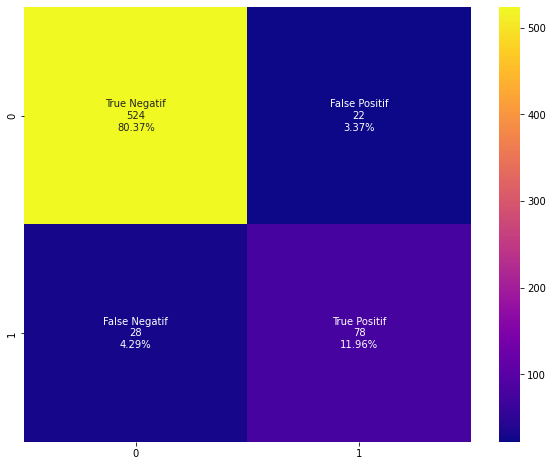

In [72]:
y_test_pred_xgb = xgb_grid.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_tuned)

group_names = ['True Negatif', 'False Positif', 'False Negatif', 'True Positif']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10, 8))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='plasma')

- diprediksi churn (TP+FP) = 22+78 = 100
- Positive predicted value (TP/TP+FP) = 78/78+22 = 78%

- diprediksi tidak churn (TN+FN) = 524+28 = 552
- Negative predicted value (TN/TN+FN) = 524/524+28 = 95%

- Sebenarnya churn (TP+FN) = 78+28 = 106
- True positive rate/Sensitivity/recall (TP/TP+FN) = 78/78+28 = 74%

- Sebenarnya tidak churn = FP+TN = 22+524 = 546
- True negative rate/specificity (TN/TN+FP) = 524/524+22 = 96%

- Model akan menangkap 74% dari customer yang sebenarnya akan churn
- Model akan menangkap 96% dari customer yang sebenarnya tidak akan churn
- Dari customer yang diprediksi akan churn, 78% dari mereka benar-benar akan churn
- Dari customer yang diprediksi tidak akan churn, 95% dari mereka benar-benar tidak akan churn
- akurasi (berapa persen data yang berhasil diprediksi dengan benar sesuai dengan aktual label) = TP+TN/TP+FP+TN+FN = 78+524/78+22+524+28 = 602/652 = 92%

# Feature Importance

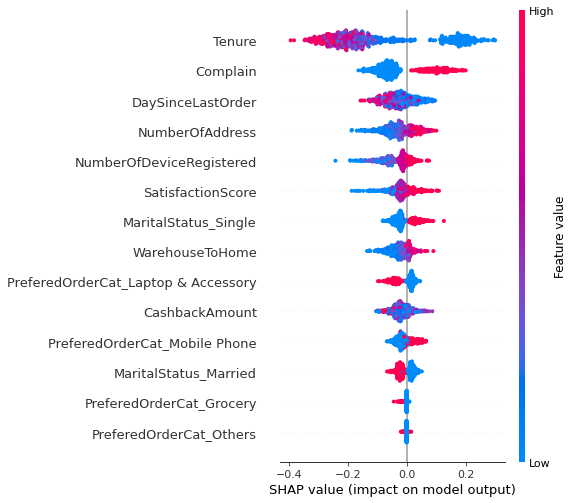

In [ ]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

- Plot ini mengurutkan feature berdasarkan jumlah besaran nilai SHAP pada semua sampel dan juga menunjukkan dampak distribusi yang dimiliki setiap feature pada output model.
- keterangan:
- Kumpulan titik-titik yang membentuk warna adalah titik yang kita dapat dari setiap data observasi
- Warna biru berarti data observasi yang memiliki nilai rendah
- Warna merah berarti data observasi yang memiliki nilai tinggi
- churn ada di bagian sebelah kanan garis
- tidak churn ada di bagian sebelah kiri garis

### 3 feature teratas yang mempengaruhi churn adalah tenure, complain, dan daysincelastorder.
- Tenure
Semakin singkat berlangganan, potensi churn semakin meningkat
- Complain
Semakin banyak complain, potensi churn semakin meningkat
- DaySinceLastOrder
Semakin singkat interval pemesanan, potensi churn semakin meningkat
- NumberOfAddress
Semakin banyak jumlah alamat yang terdaftar, potensi churn tidak terlalu meningkat
- SatisfactionScore
Semakin tinggi nilai kepuasan, potensi tidak churn semakin meningkat
- WarehouseToHome
Semakin jauh jarak dari gudang ke rumah, potensi churn tidak semakin meningkat
- CashbackAmount
Semakin sedikit jumlah cashback yang didapatkan, potensi churn semakin meningkat

## Recommendation for E-Commerce

- Menggunakan jumlah total cashback yang sama tetapi alokasi yang berbeda, seperti menurunkan 4% Cashback pada jumlah customer tidak churn dan meningkatkan 20% Cashback pada jumlah customer Churn. Biayanya hampir sama dengan biaya pemasaran.
- Membatasi jumlah device yang terhubung.
- Memberikan penawaran alokasi 10% cashback pada customer churn dan 10% potongan ongkos kirim (total 20%) pada potensi customer churn yang memiliki jarak dari warehouse ke rumah customer yang jauh.
- Berdasarkan tenure bahwa customer yang churn banyak terjadi di 0-2 bulan, maka dapat dilakukan survey pada customer baru di awal 1 bulan pemakaian agar alasan customer churn bisa diketahui lebih dalam, kenapa banyak churn di bulan-bulan pertama pemakaian platform.
- Berdasarkan hari terakhir, banyak customer churn dihari 1-2 terakhir order dan orderannya adalah kebanyakan churn dari kategori mobile phone. Maka perbanyak kategori barang agar lebih menarik customer.
- Berdasarkan complain, customer yang churn lebih banyak complain, maka tim customer service harus ekstra sabar dalam menghadapi complain dan membuat tim customer service dibagi menjadi 3 shift kerja agar dapat 24 jam melayani customer yang complain.

# Recommendation for Model

- Menambahkan feature 'age' agar bisa diketahui alasan di balik churn paling banyak di umur berapa dan agar bisa diketahui apakah churn tersebut tipe voluntary atau involuntary. Involuntary churn adalah customer yang pindah dari platform berdasarkan faktor eksternal seperti berpindah lokasi, kematian, dll. Sedangkan voluntary churn adalah customer yang berpindah dari platform karena sengaja berhenti maupun sengaja beralih ke platform lain. Saya rasa feature age dapat menjadi feature yang cukup berpengaruh penting untuk ditambahkan dalam memprediksi churn 
- Menambahkan data dikelas 1 (churn) agar model dapat belajar dari banyak data.
- Mencoba menggunakan algoritma machine learning lain yang belum dicoba, dan menerapkan langkah langkah seperti feature select by feature importances/coef
- Mencoba menggunakan threshold
- Mencoba metode oversampling lain seperti RandomOversampling
- Mencoba untuk tidak drop semua outlier yang ada

# Saving model with pickle

In [76]:
# save
import pickle

In [77]:
# Model Akhir
xgb_best_model = xgb_grid.best_estimator_
beami_churn_model = best_model.fit(X, y)
pickle.dump(beami_churn_model, open('XGB_machine_learning_beami.sav', 'wb'))